#**Austo** **Motor** **Company**

###**IMPORTING** **THE** **LIBRARIES**

In [1]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd
# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

##**LODING** **THE** **DATA**

In [2]:
# Reading the data
aut = pd.read_csv('/content/austo_automobile+%282%29+%281%29 (1).csv')
# Returns the first 5 rows
aut.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


## **STRUCTURE** **OF** **THE** **DATA**

In [3]:
# The shape of the dataset
aut.shape

(1581, 14)

In [4]:
# Check data types
aut.dtypes

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents      int64
Personal_loan        object
House_loan           object
Partner_working      object
Salary                int64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object

In [5]:
# The information of the data
aut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [6]:
#missing values in the data
aut.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [7]:
# Fill missing values in 'Gender' with the mode
aut['Gender'].fillna(aut['Gender'].mode()[0], inplace=True)
# Verifying if missing values are filled
aut.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [8]:
# Filling the missing values in 'Partner_salary' with the mean
aut['Partner_salary'].fillna(aut['Partner_salary'].mean(), inplace=True)

# Verifying if missing values are filled
aut.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [9]:
# statistics of the numerical data
aut.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,18905.183912,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,24900.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38000.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


**DATA** **IRREGULARITIES**

In [10]:
# Checking for duplicates
duplicates = aut.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


## **Exploratory** **Data** **Analysis** (**EDA**)

### **Univariate** **Analysis**

In [11]:
# unique values in the 'Gender' column
aut['Gender'].unique()


array(['Male', 'Femal', 'Female', 'Femle'], dtype=object)

In [12]:
# Droping rows with 'Femal' and 'Femle' in the 'Gender' column
aut = aut[~aut['Gender'].isin(['Femal', 'Femle'])]
# Verifying if the rows are dropped
print(aut['Gender'].unique())


['Male' 'Female']


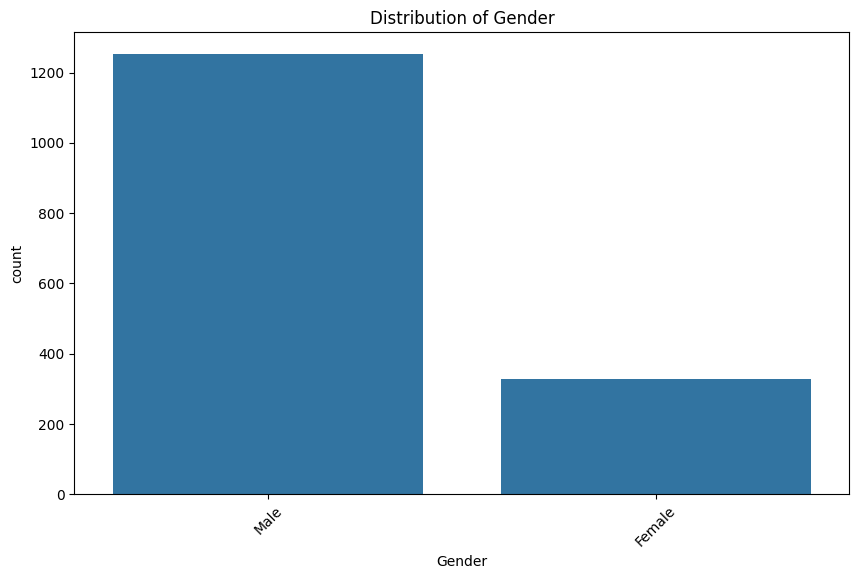

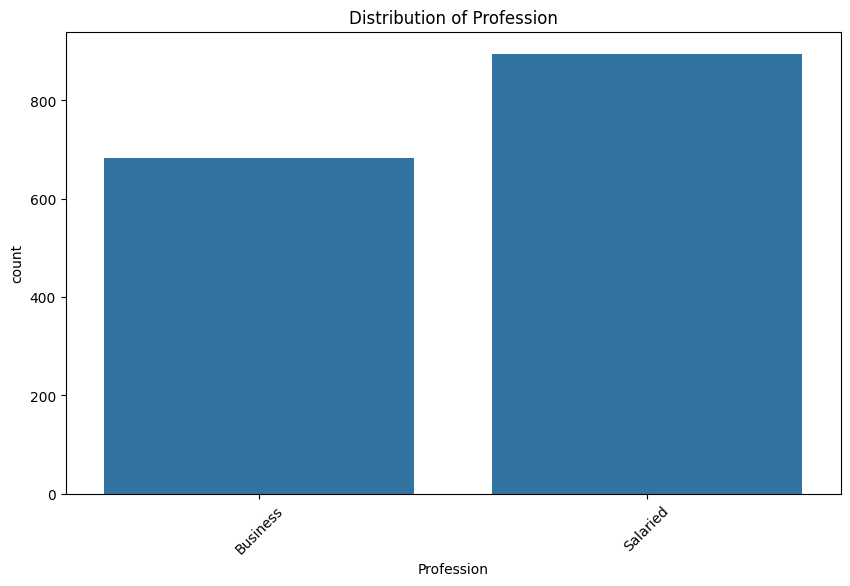

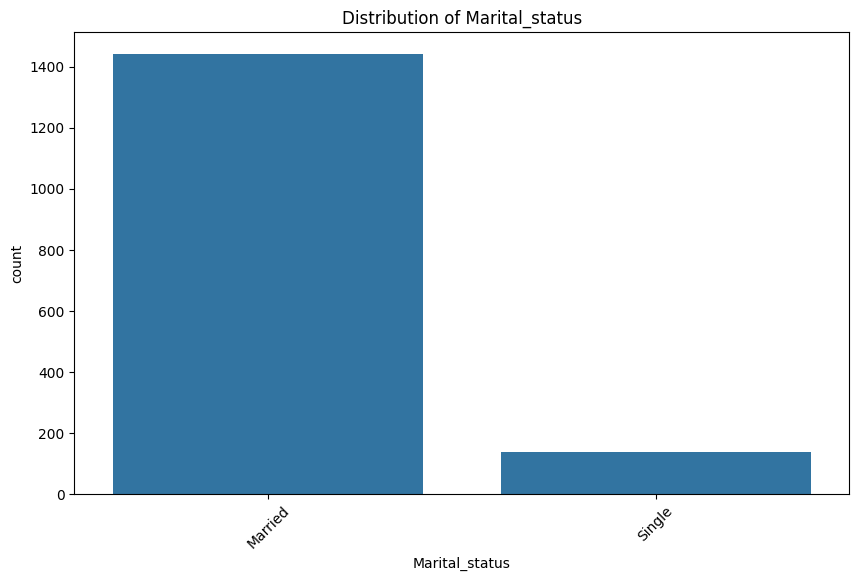

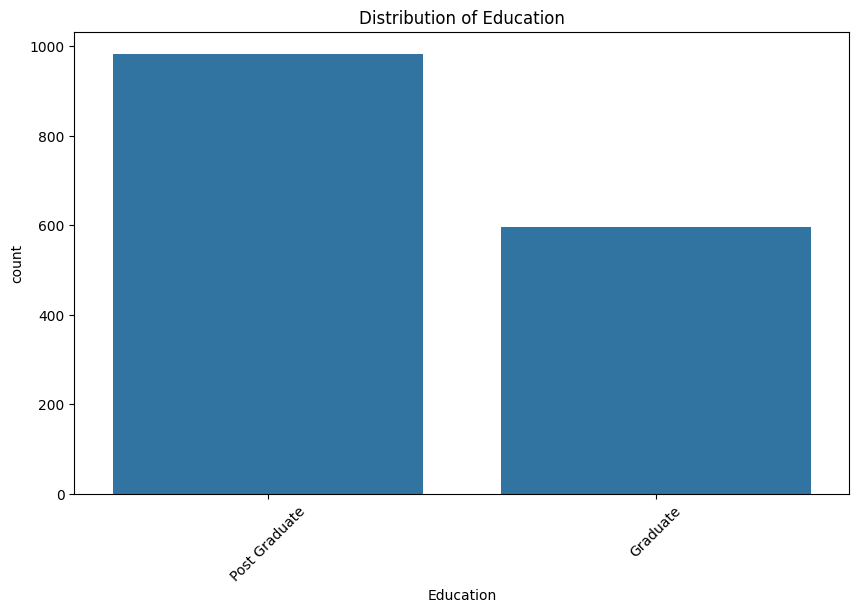

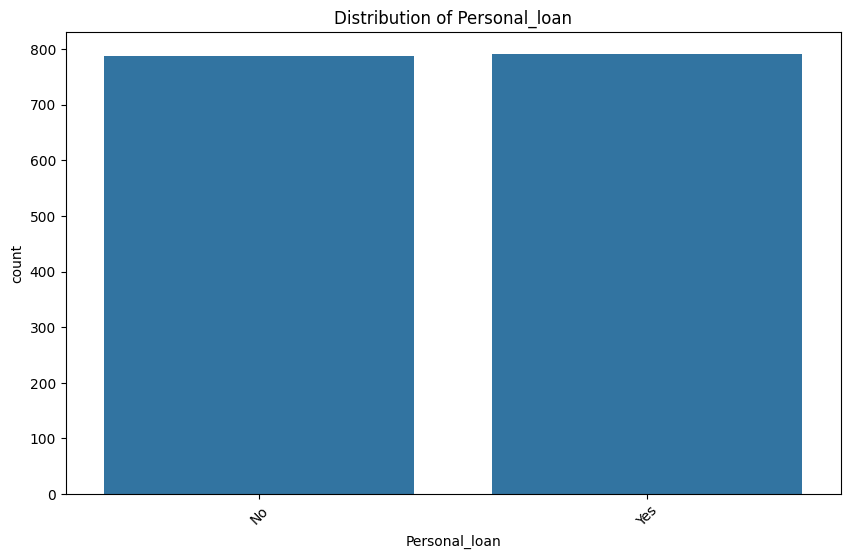

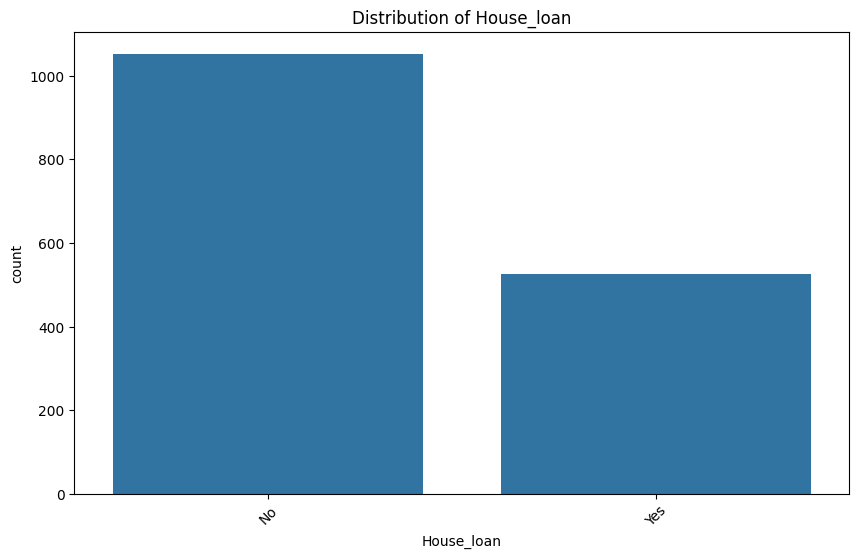

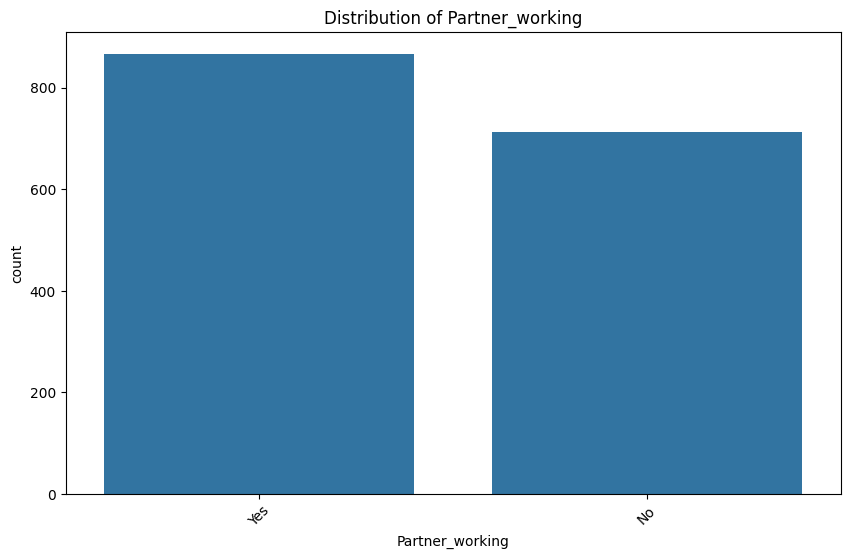

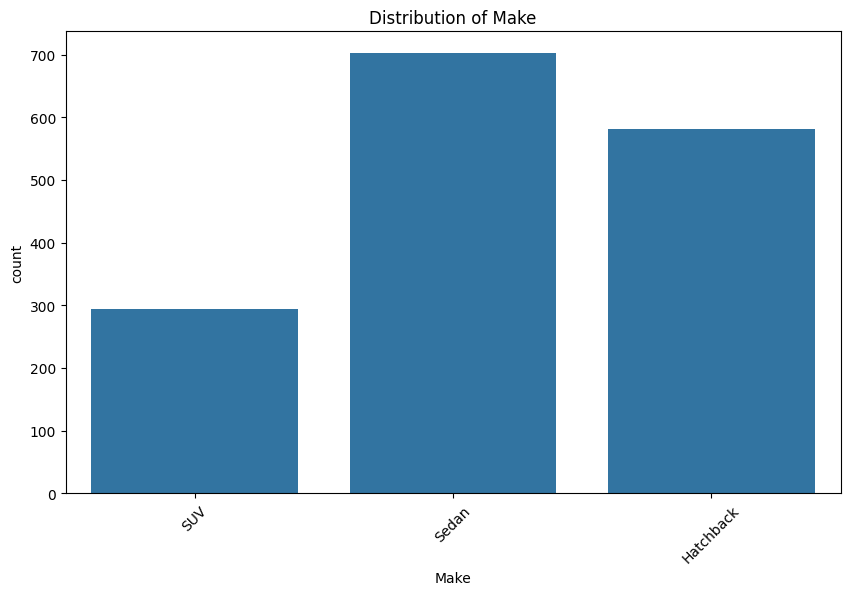

In [13]:
# Selecting categorical columns
categorical_cols = aut.select_dtypes(include=['object']).columns

# Looping through categorical columns and creating countplots
for col in categorical_cols:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, data=aut)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45)
  plt.show()


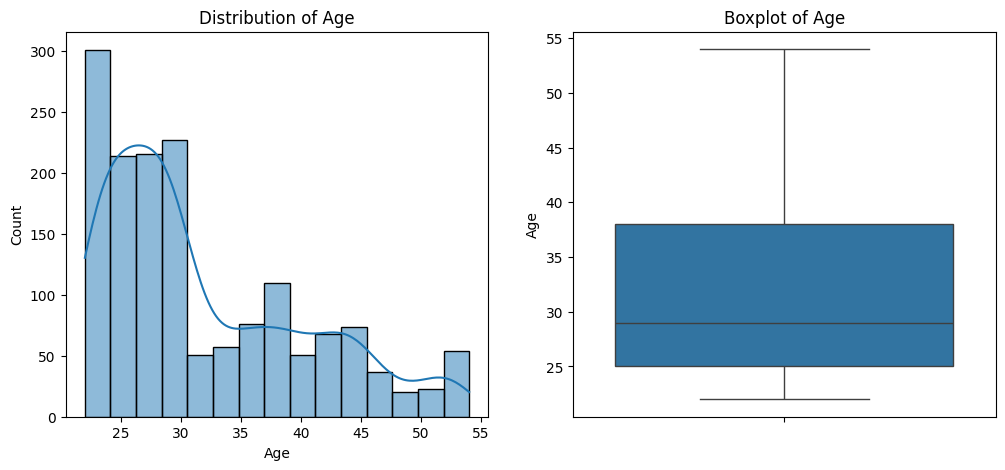

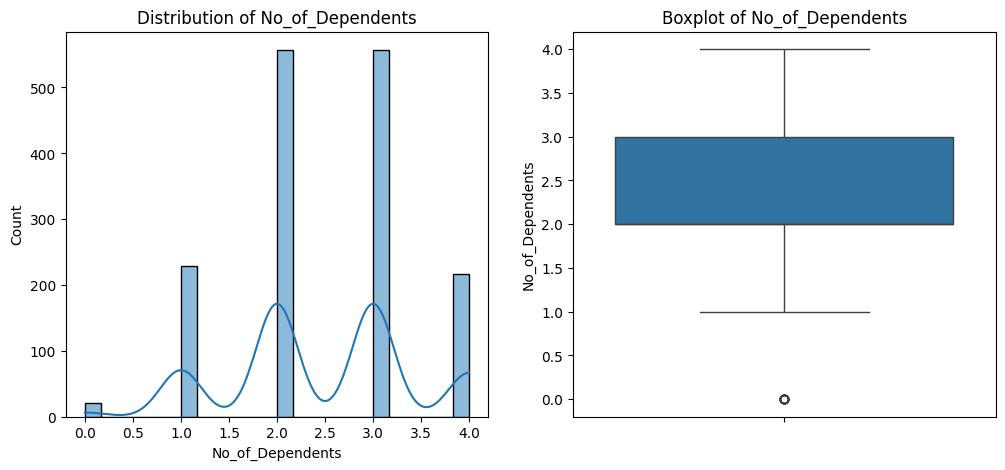

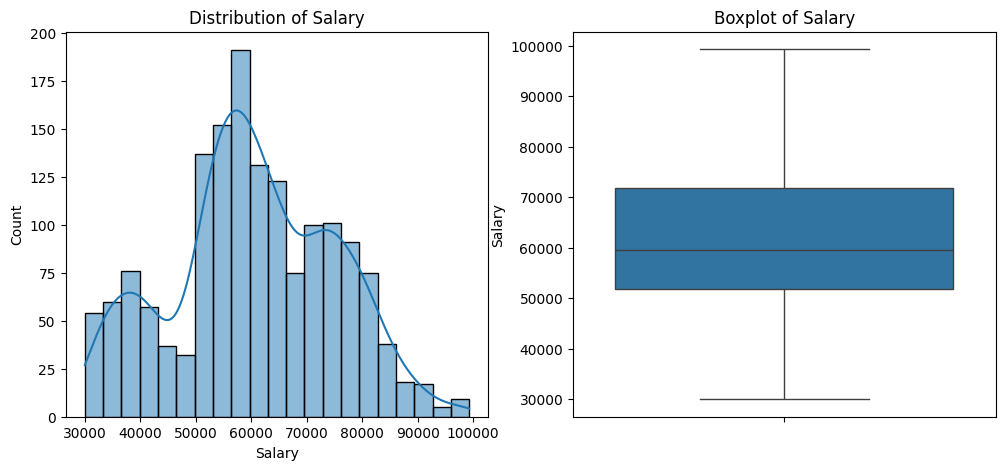

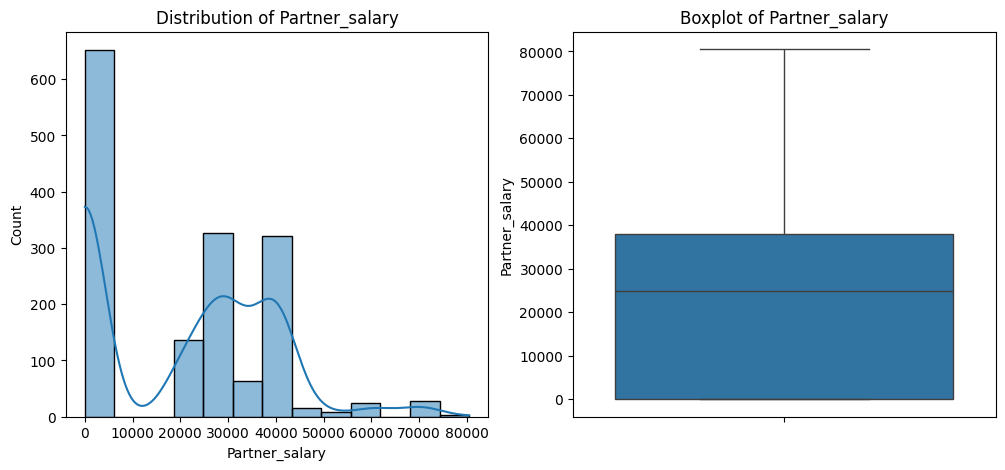

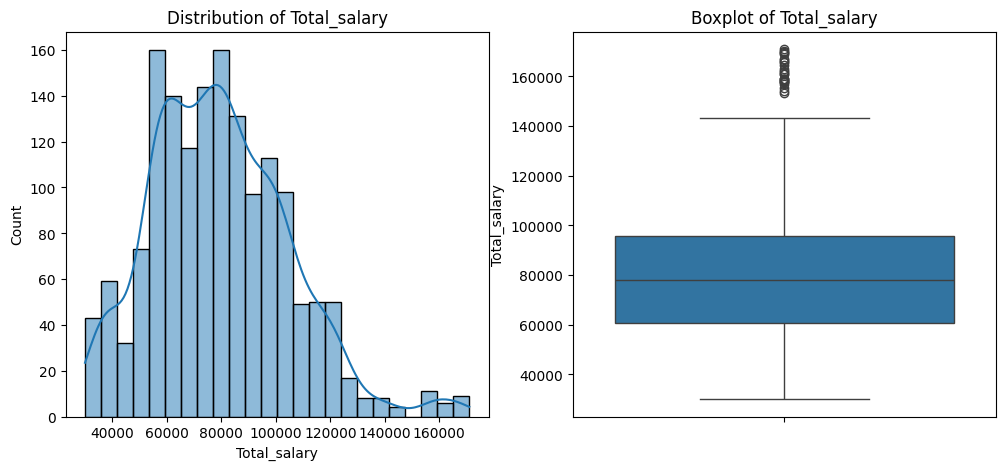

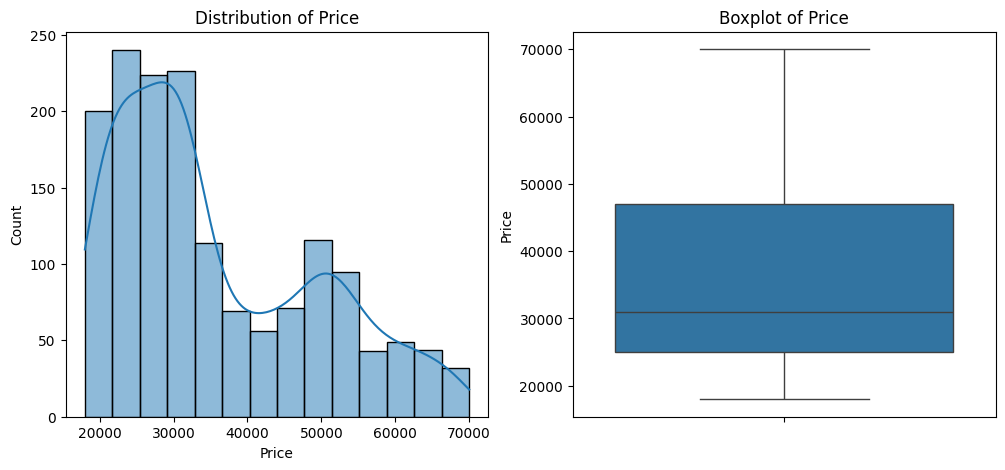

In [14]:
# Selecting numerical columns
numerical_cols = aut.select_dtypes(include=['int64', 'float64']).columns
# Looping through numerical columns and creating histograms and boxplots
for col in numerical_cols:
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(aut[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.subplot(1, 2, 2)
  sns.boxplot(y=aut[col])
  plt.title(f'Boxplot of {col}')
  plt.show()




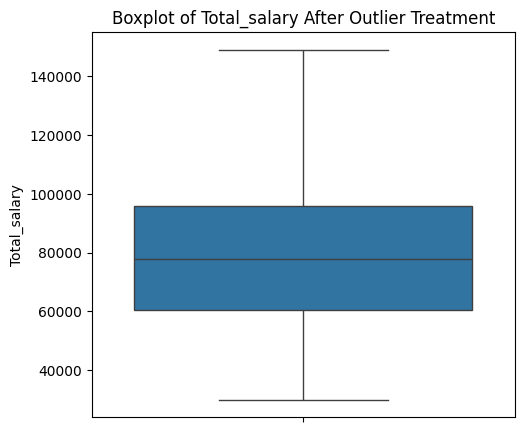

In [15]:
# Calculate the IQR for 'Total_salary'
Q1 = aut['Total_salary'].quantile(0.25)
Q3 = aut['Total_salary'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
outliers = aut[(aut['Total_salary'] < lower_bound) | (aut['Total_salary'] > upper_bound)]
# Treat outliers (replace with upper or lower bound)
aut['Total_salary'] = np.where(aut['Total_salary'] > upper_bound, upper_bound,
                                 np.where(aut['Total_salary'] < lower_bound, lower_bound, aut['Total_salary']))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=aut['Total_salary'])
plt.title('Boxplot of Total_salary After Outlier Treatment')
plt.show()

### **Bivariate  Analysis**

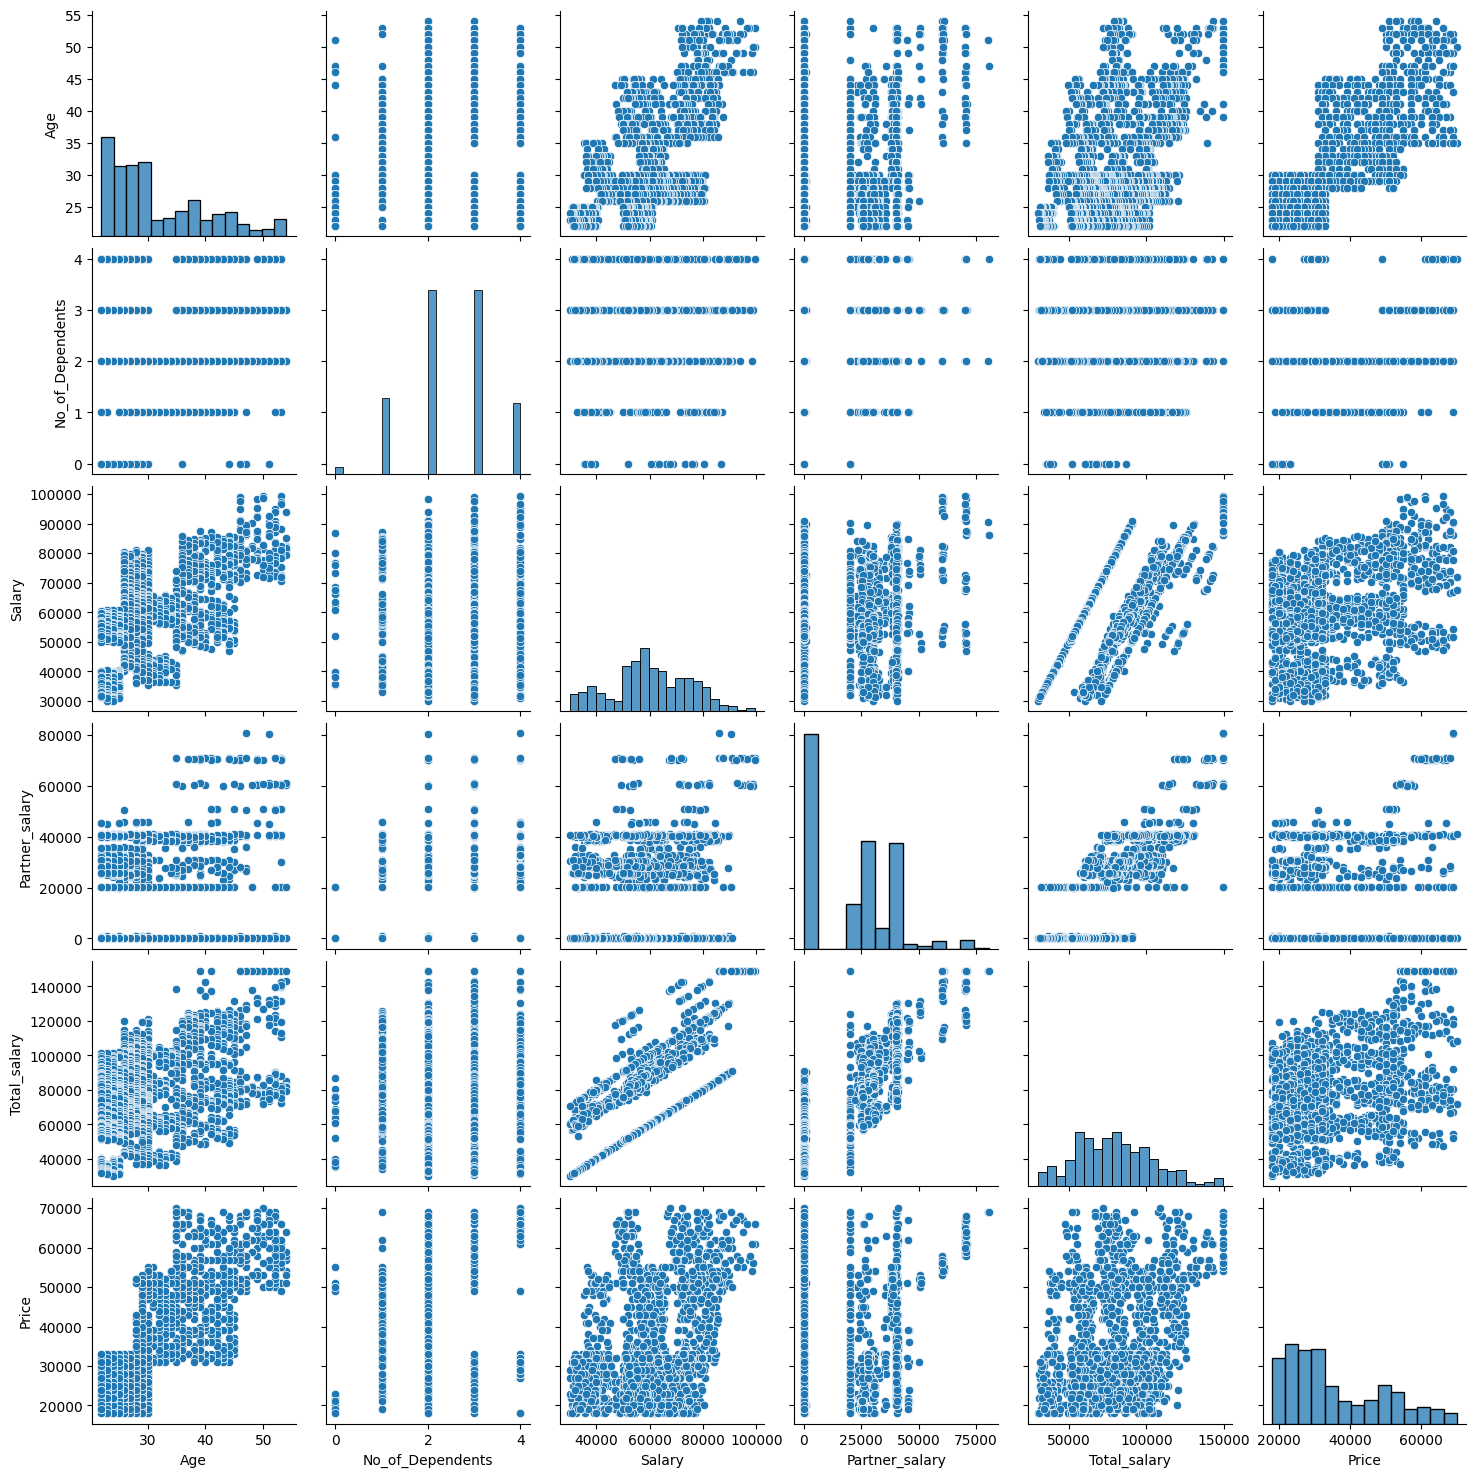

In [16]:
# Scatter plot matrix for numerical variables
sns.pairplot(aut[numerical_cols])
plt.show()


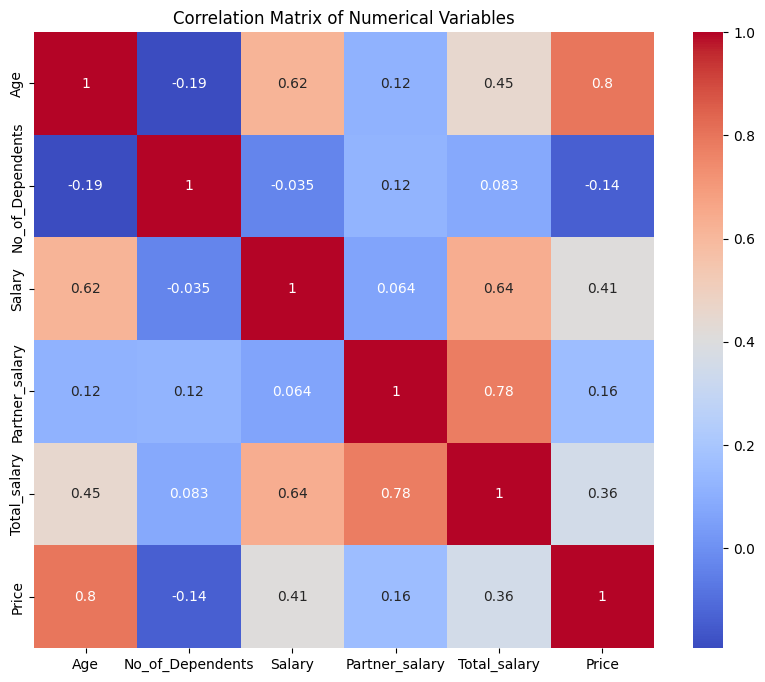

In [17]:
# Calculate correlation matrix
correlation_matrix = aut[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


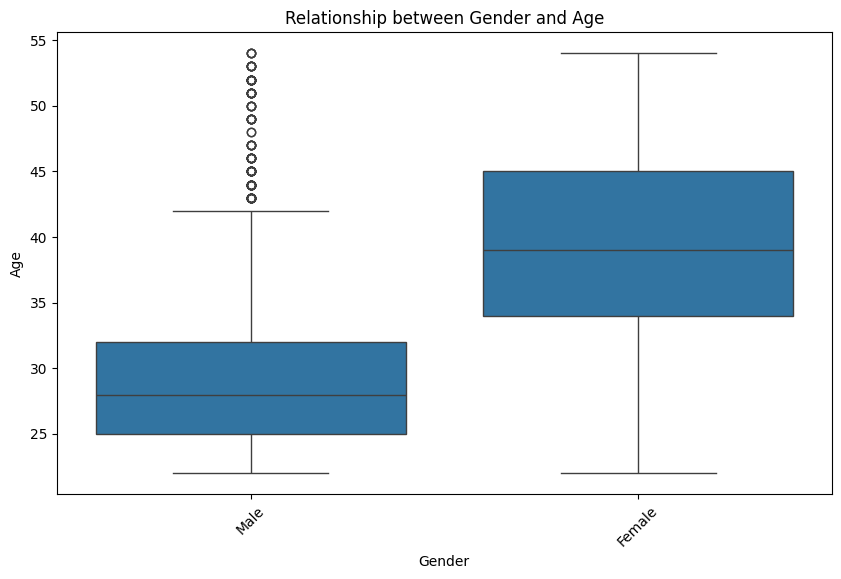

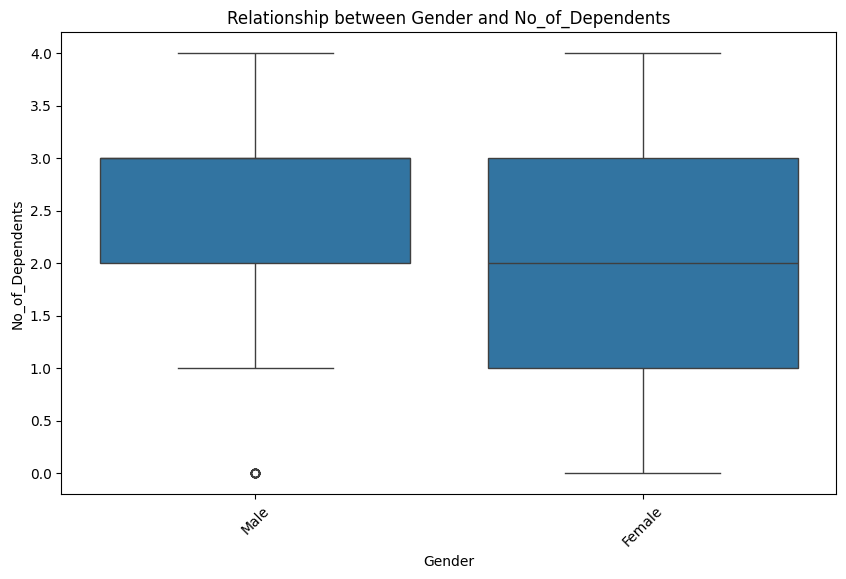

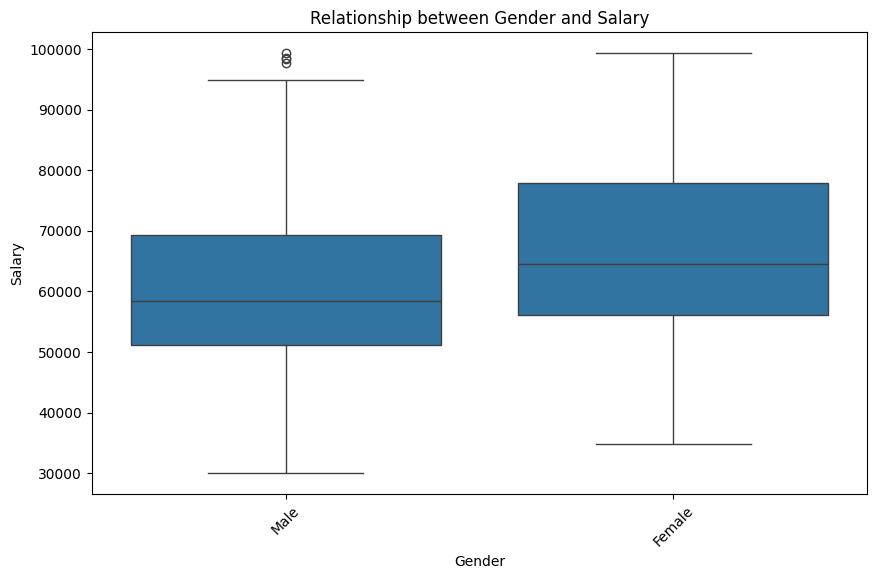

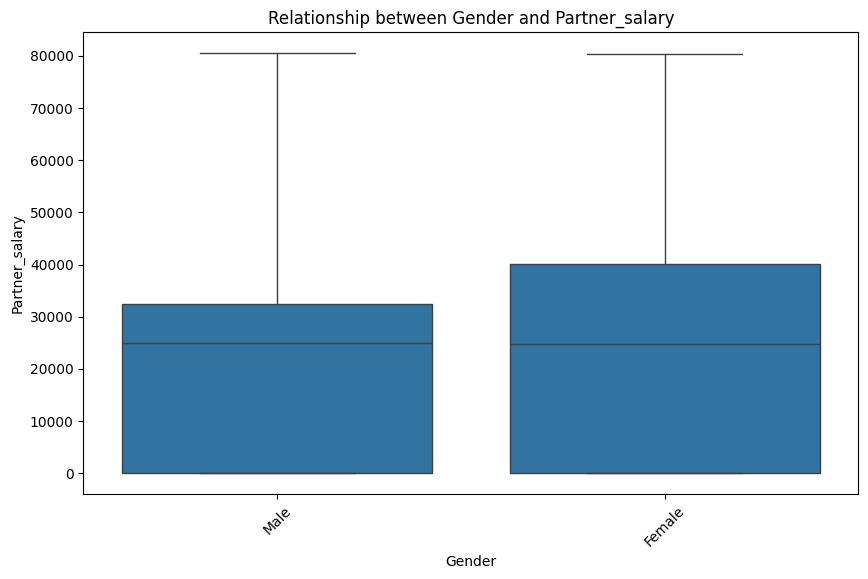

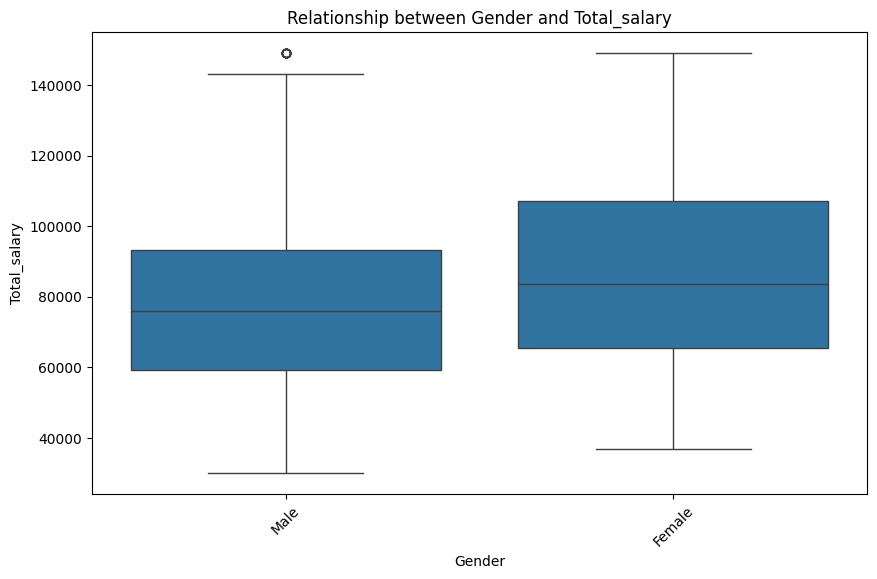

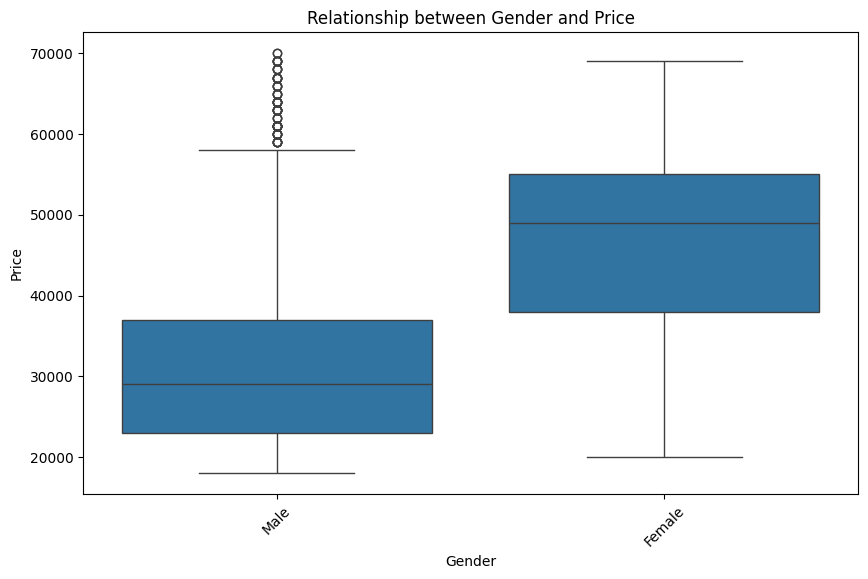

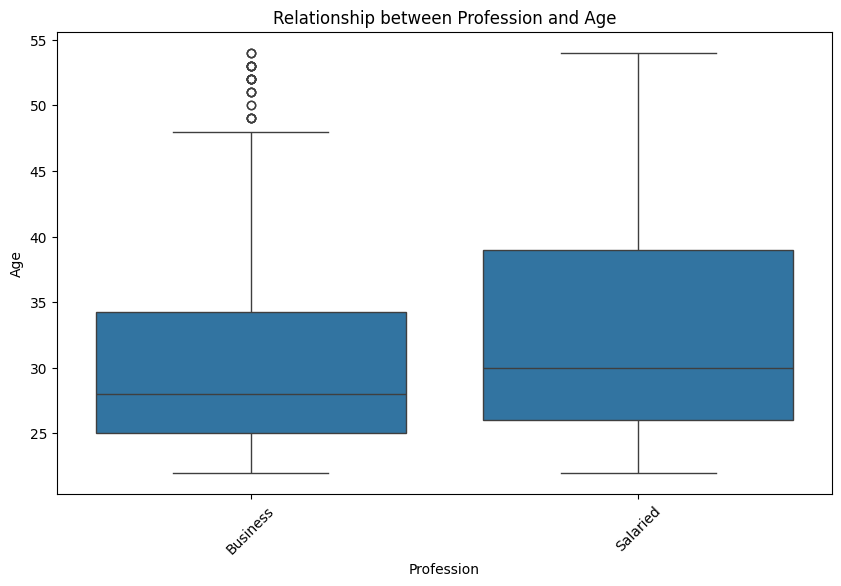

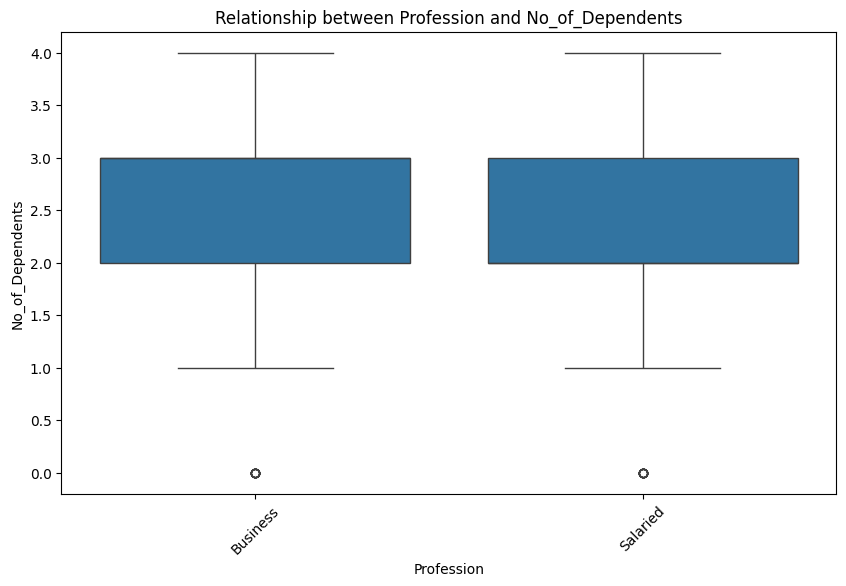

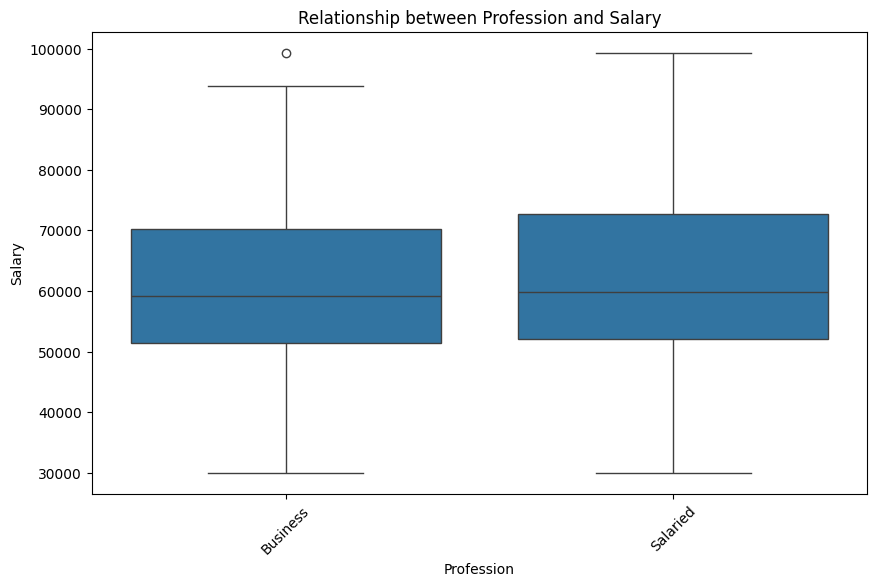

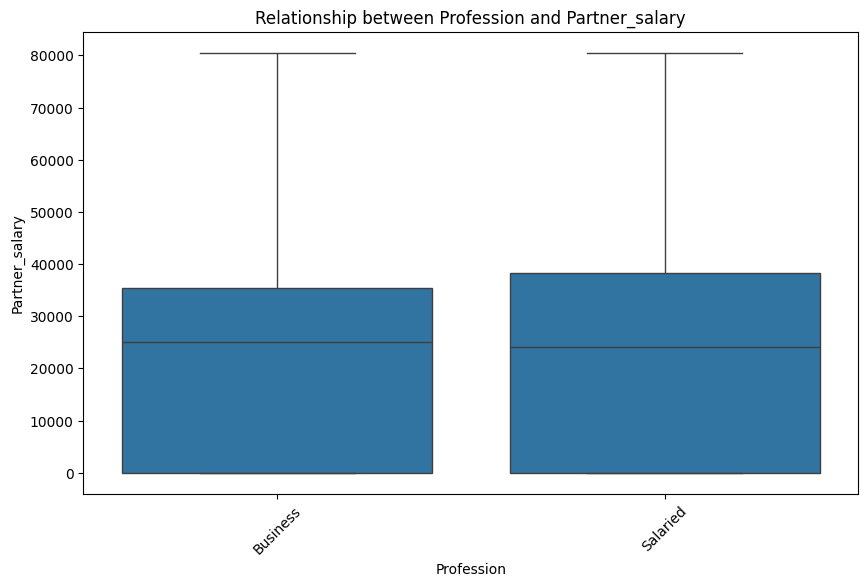

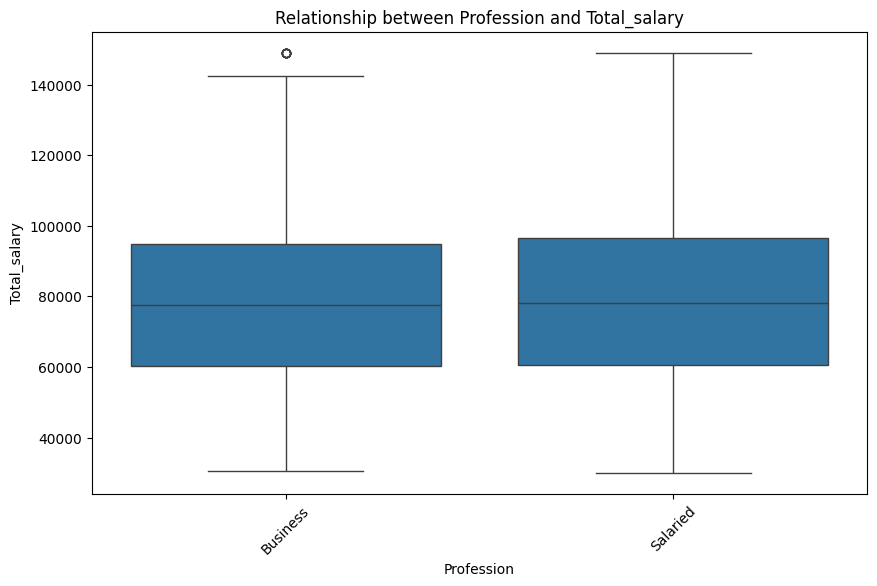

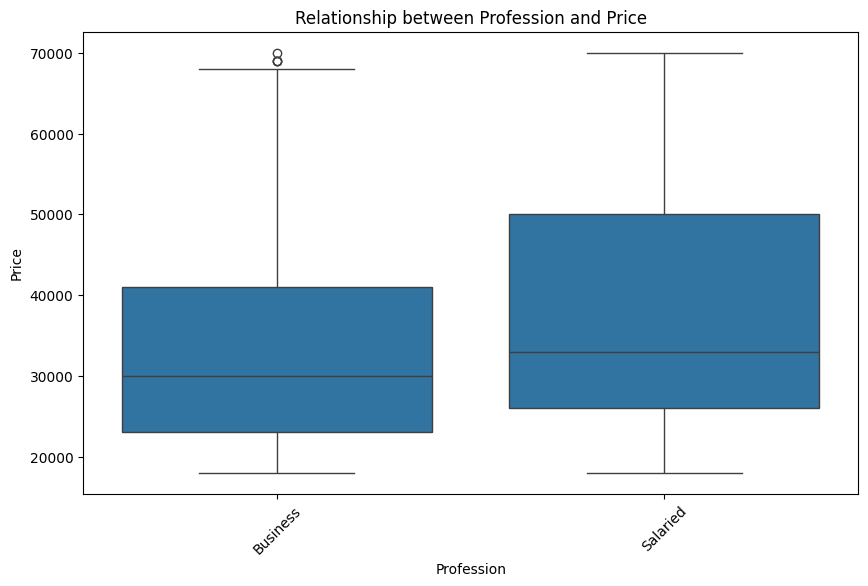

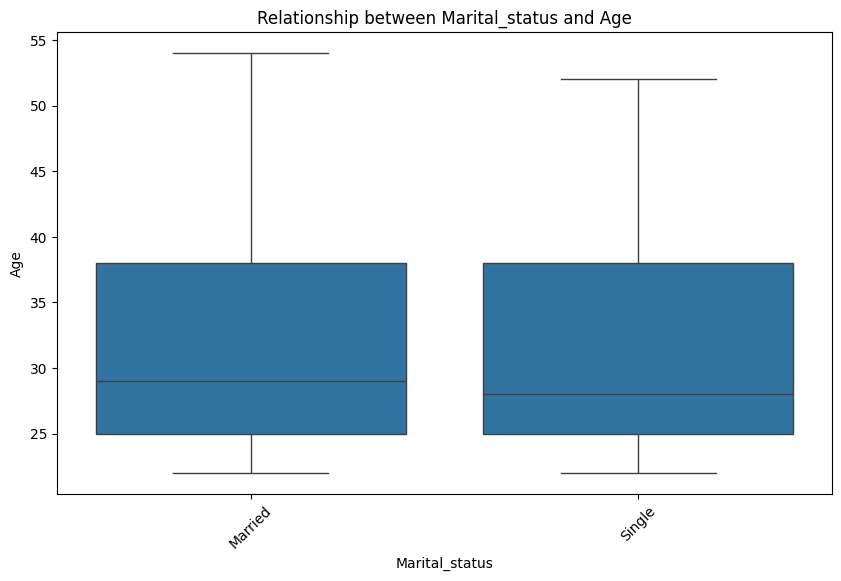

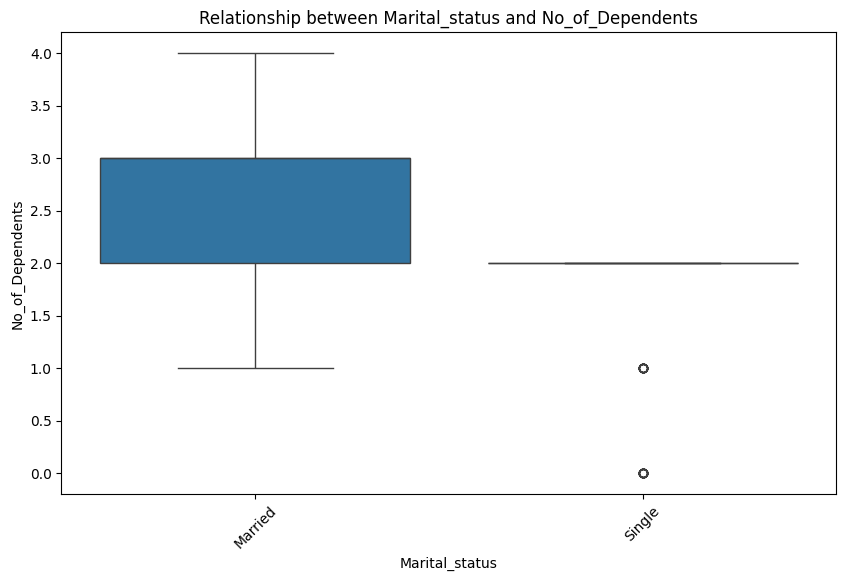

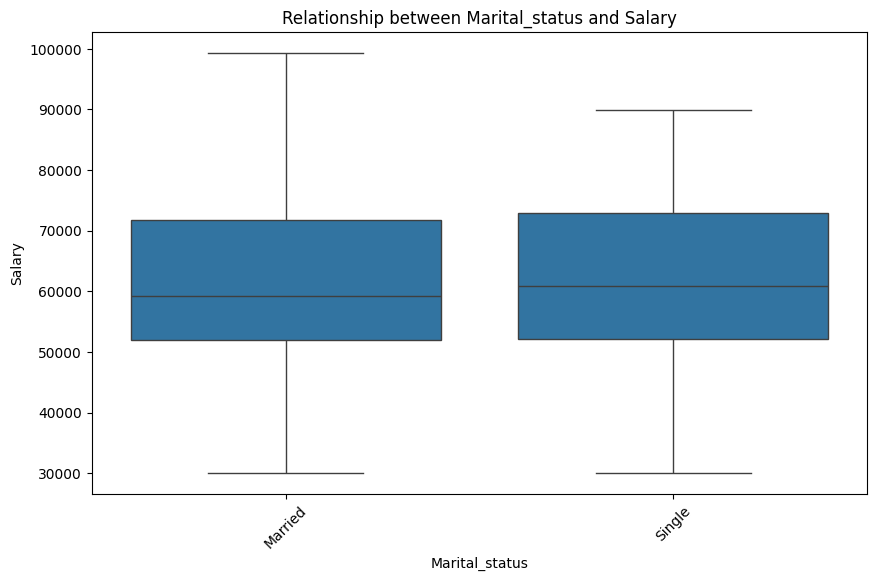

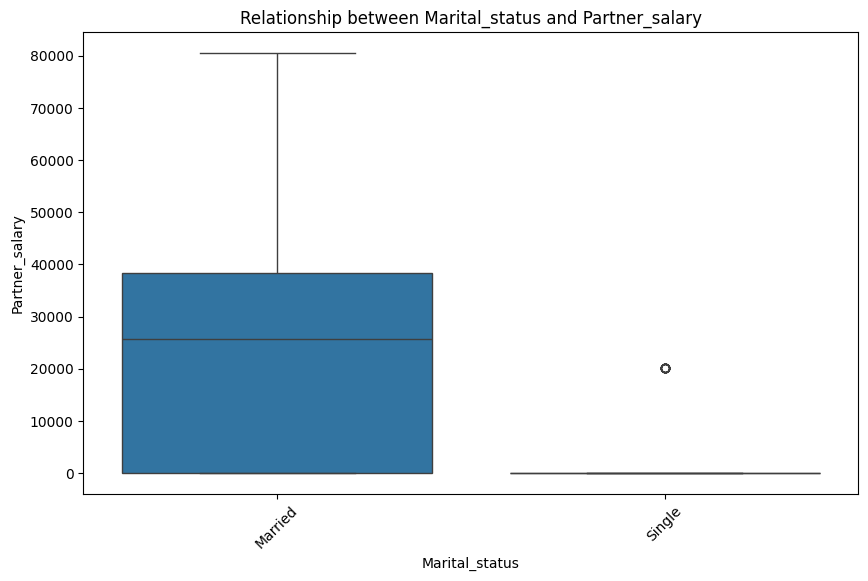

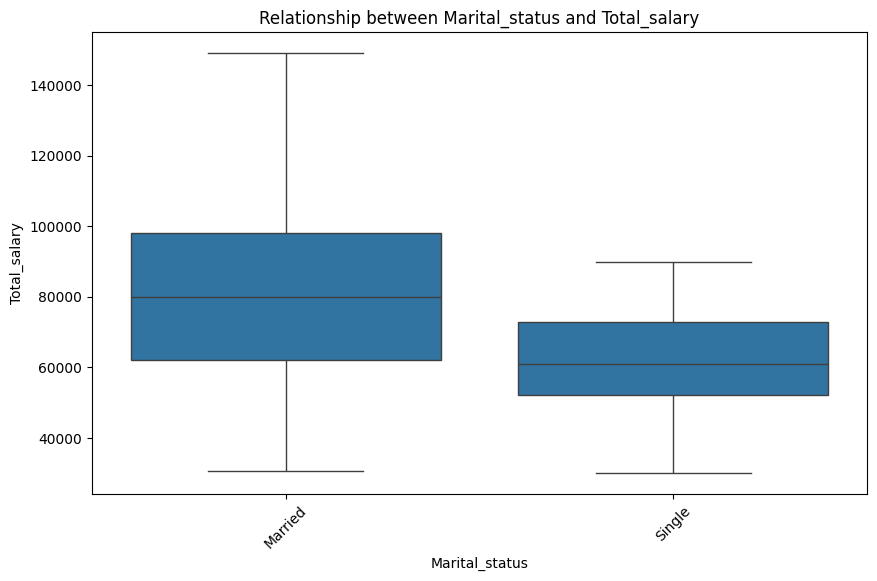

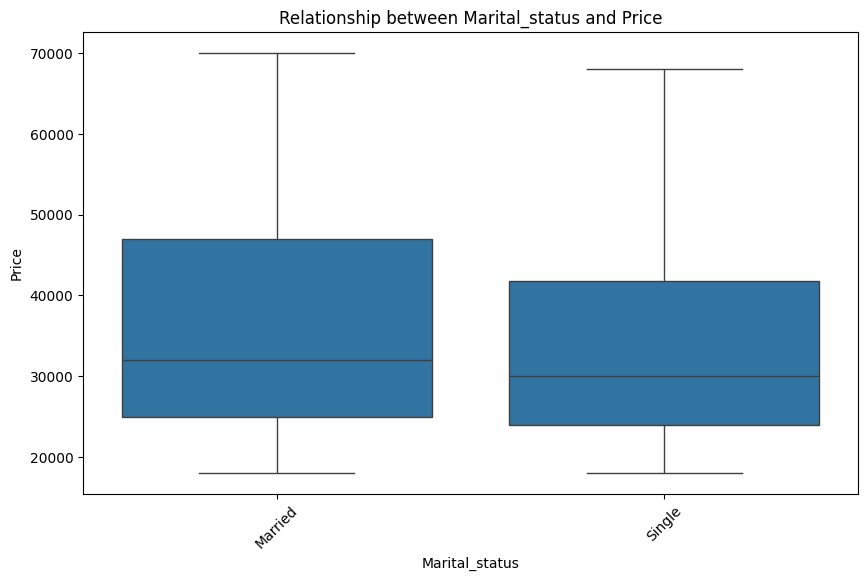

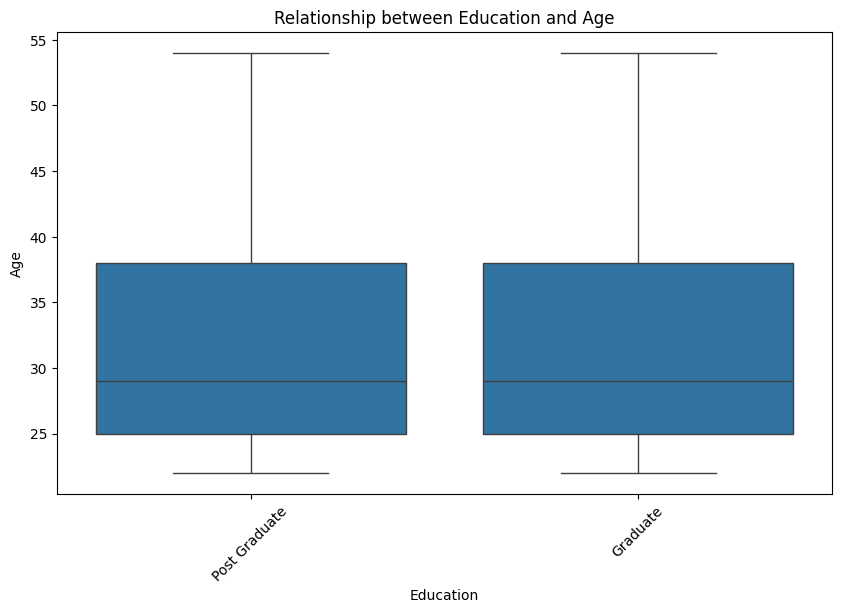

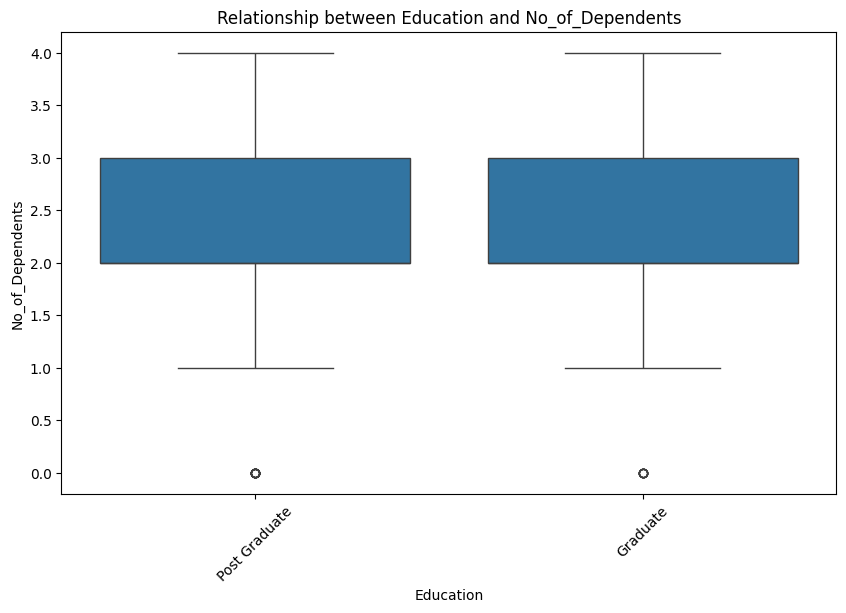

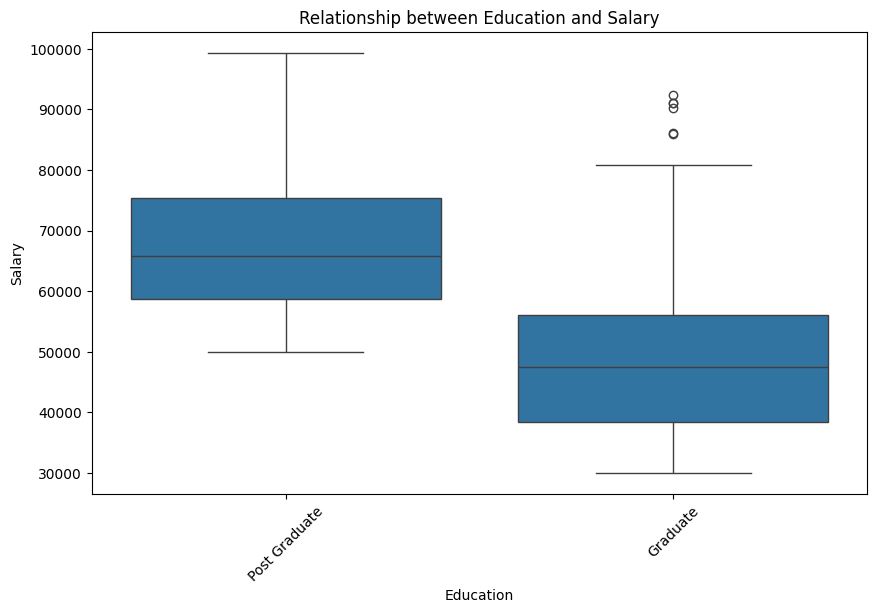

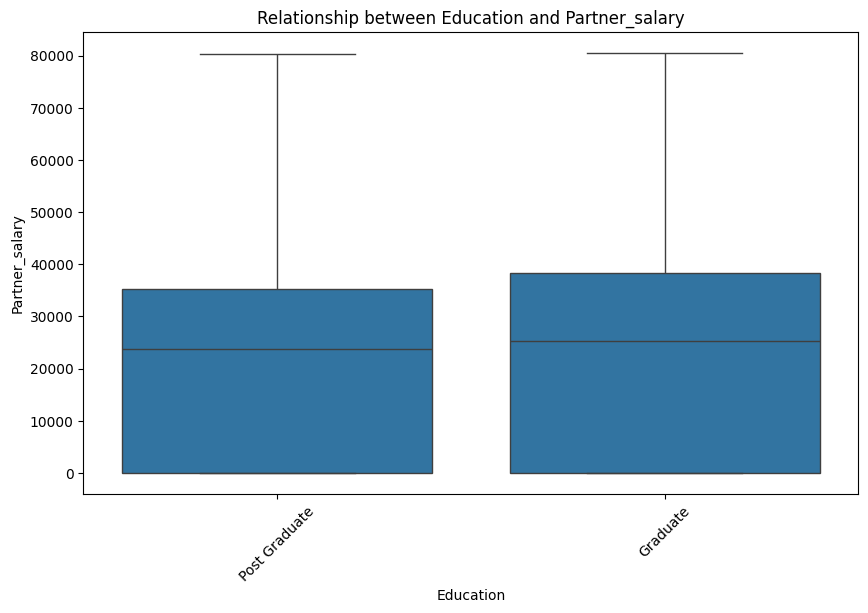

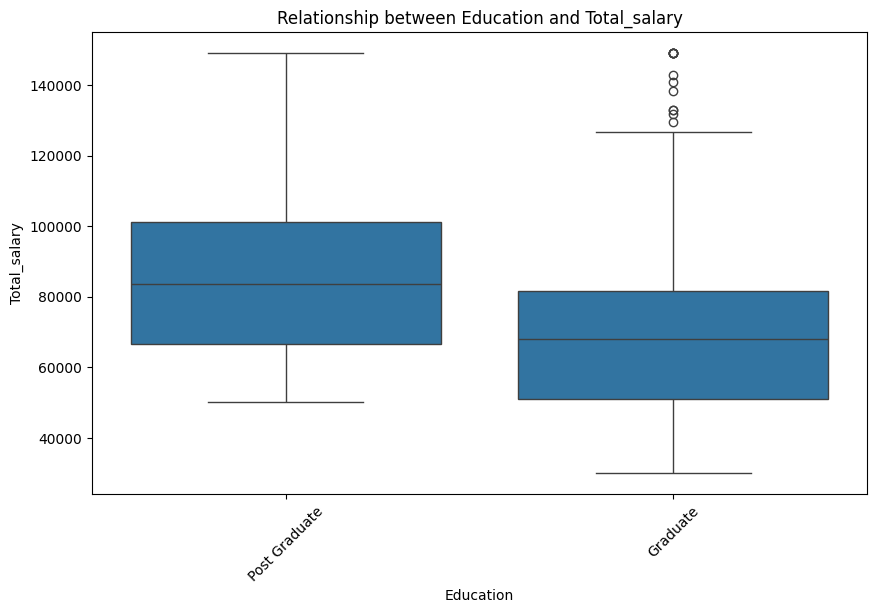

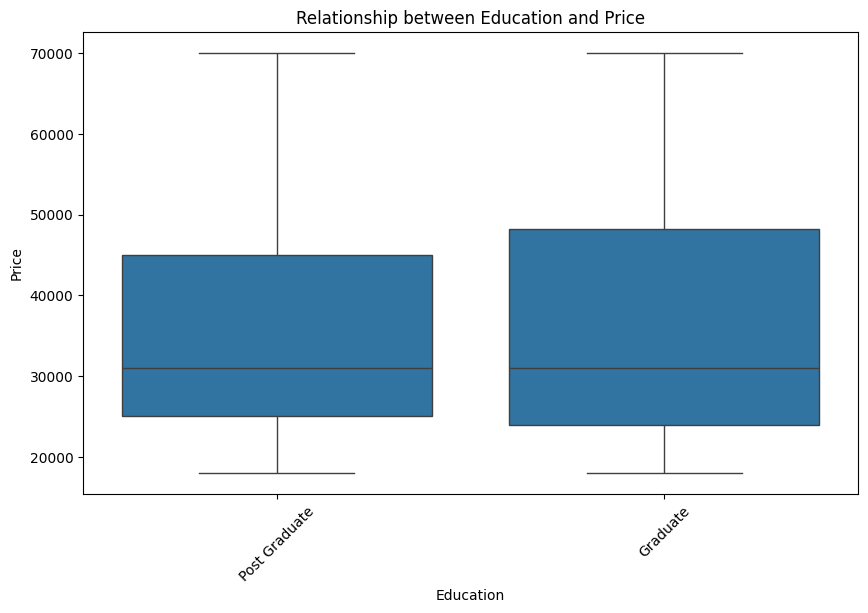

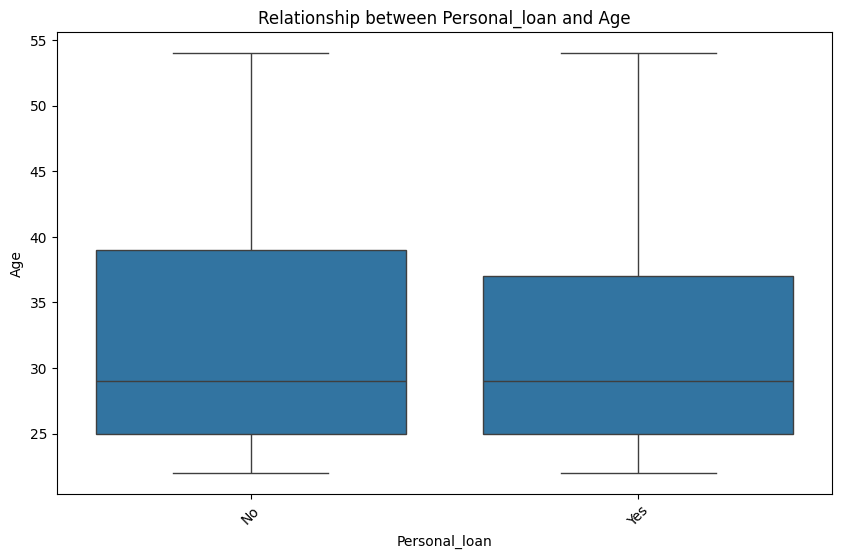

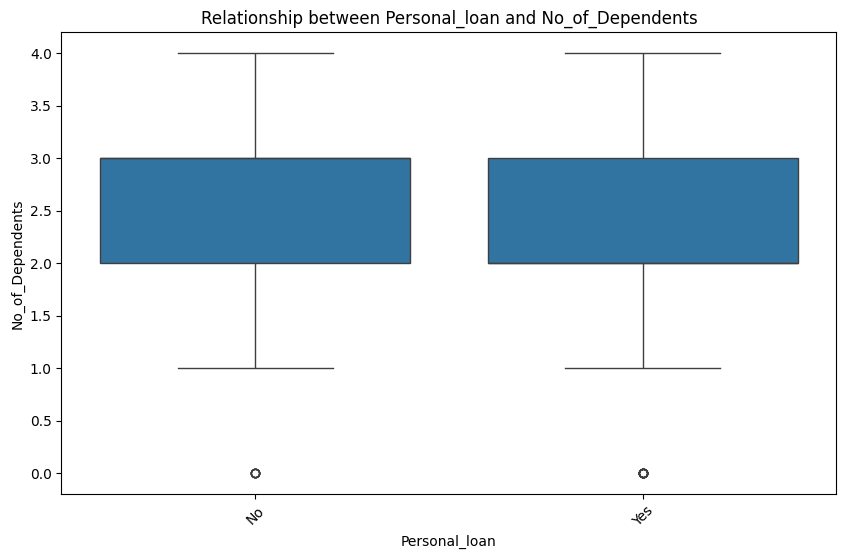

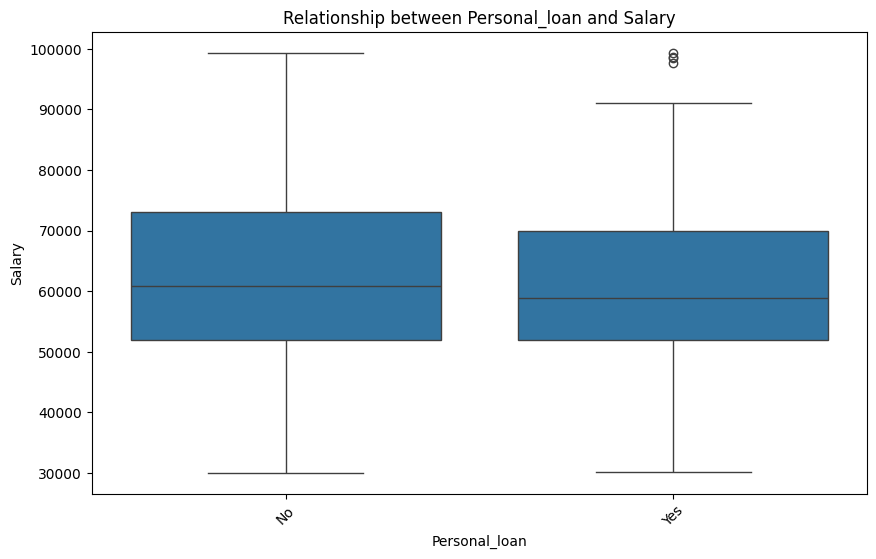

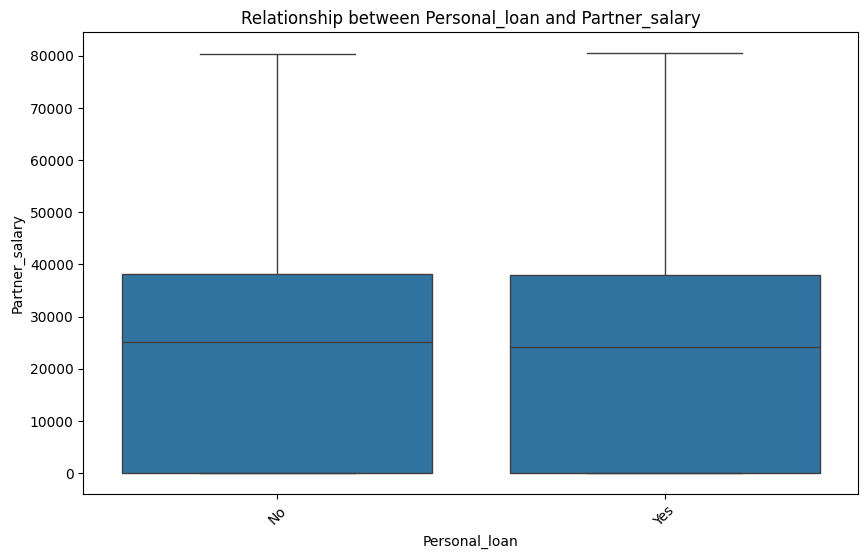

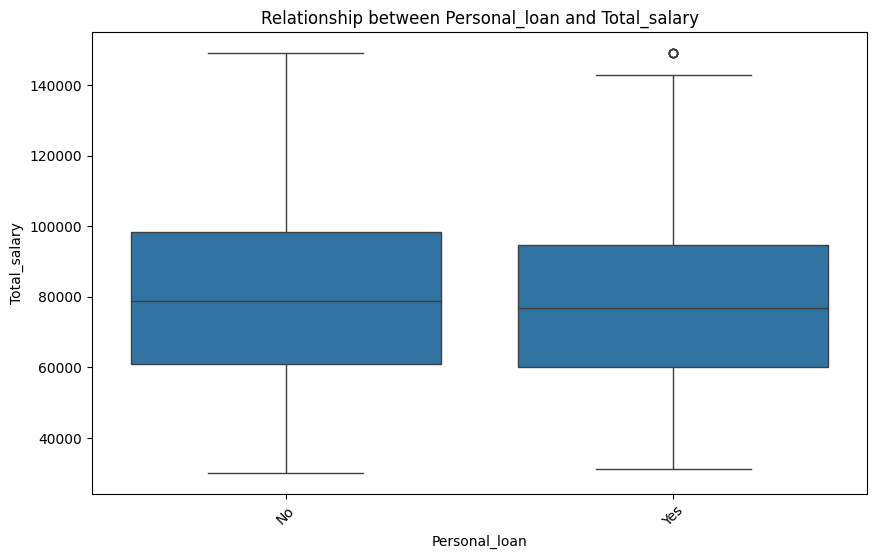

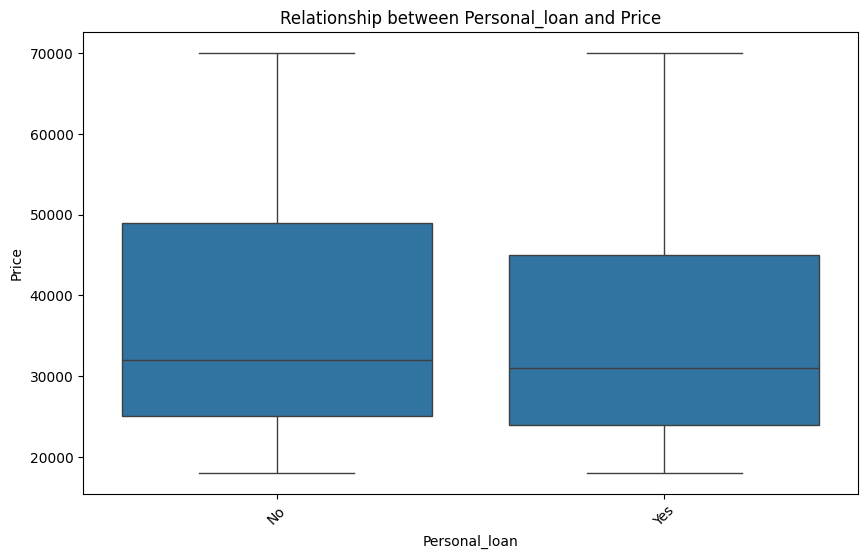

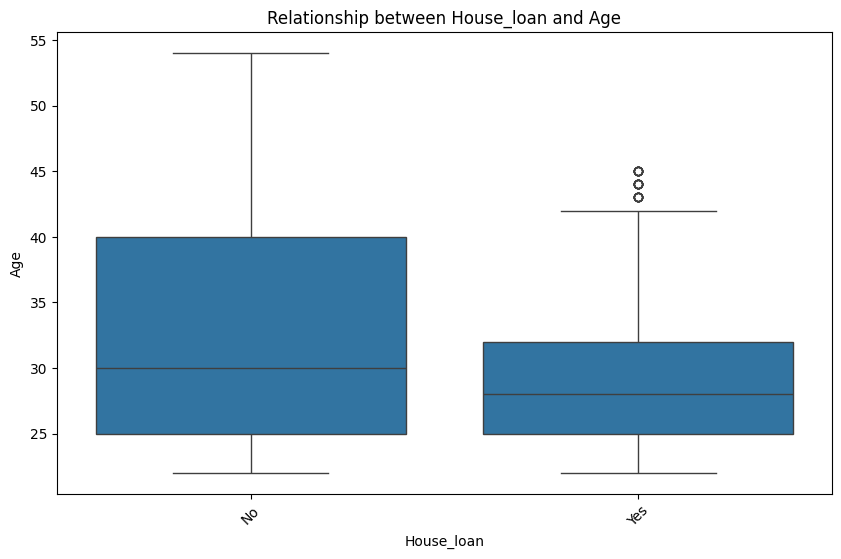

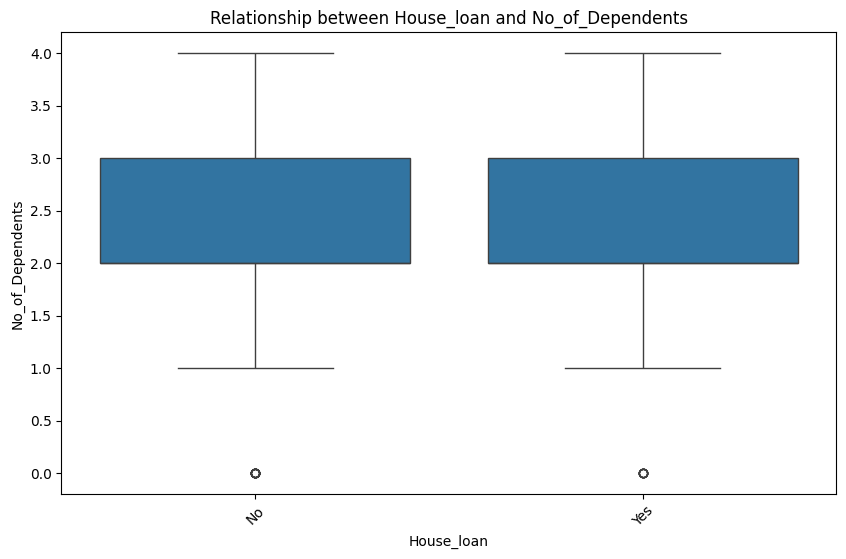

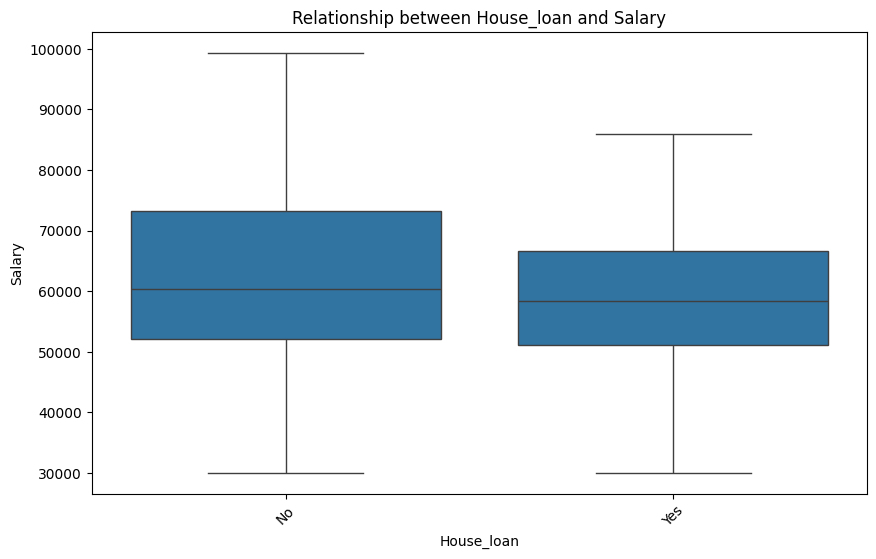

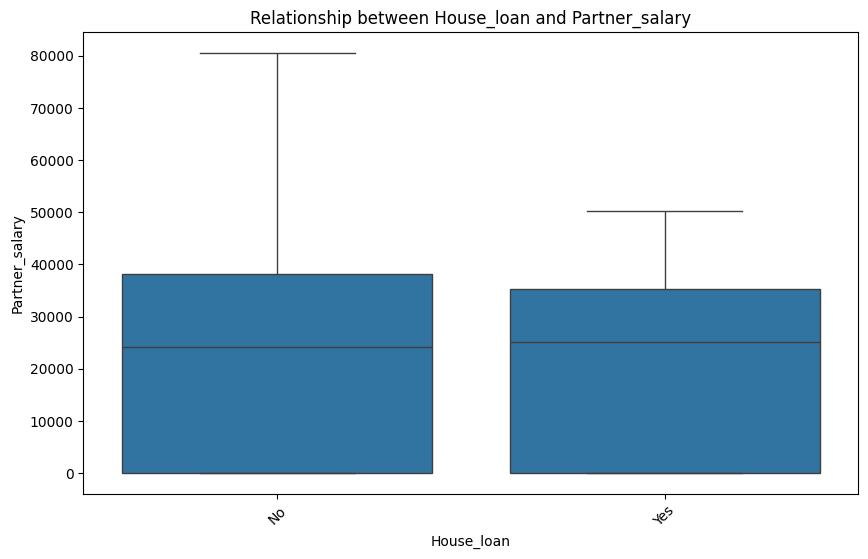

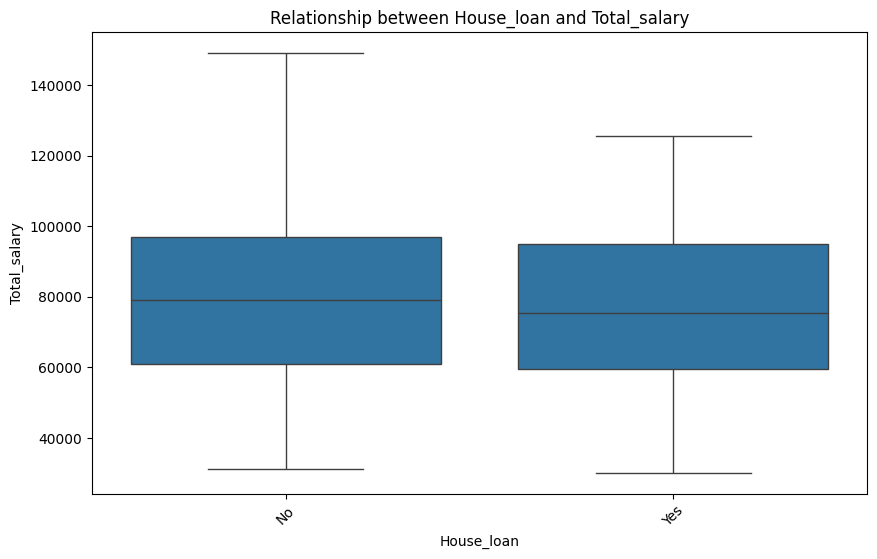

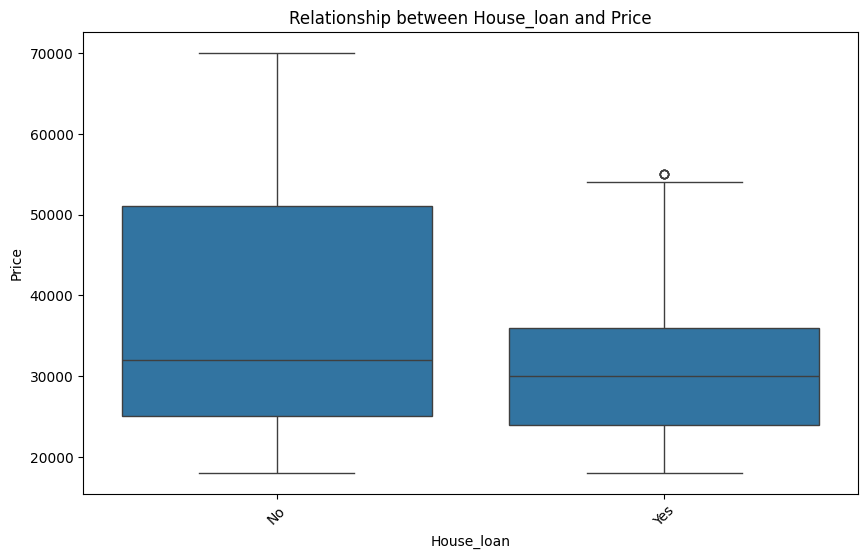

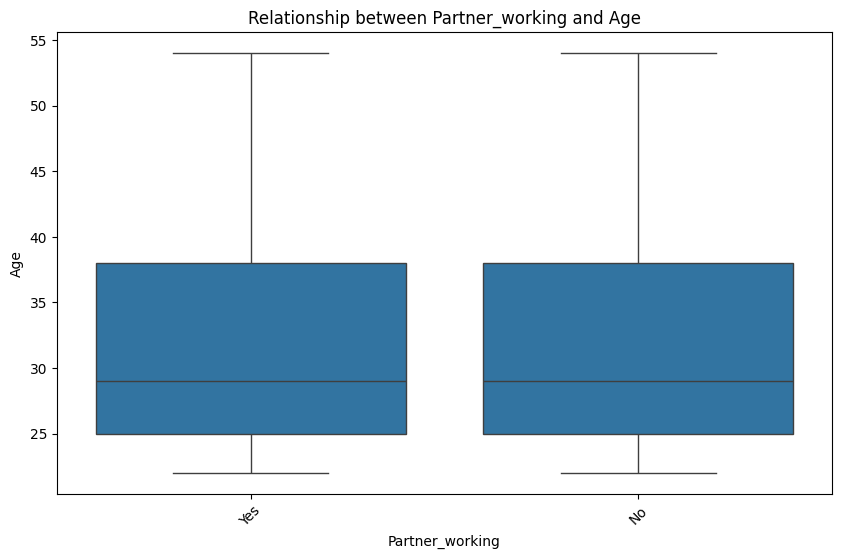

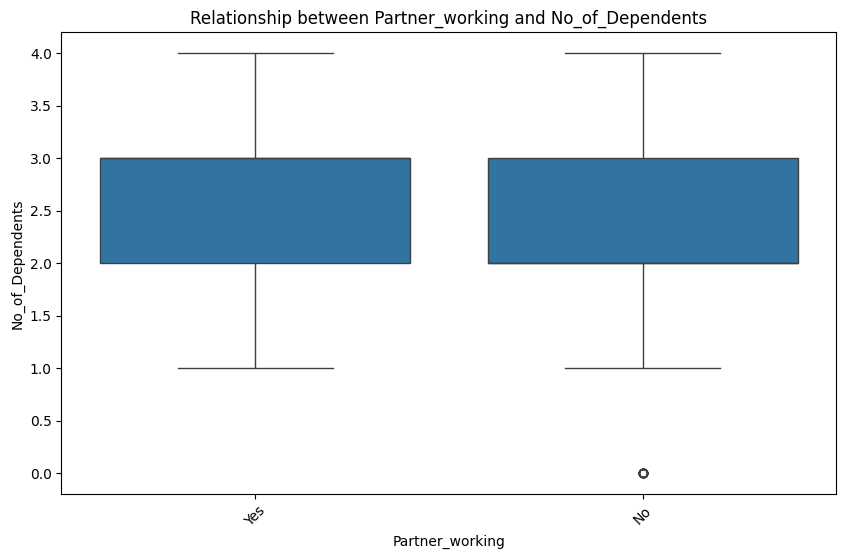

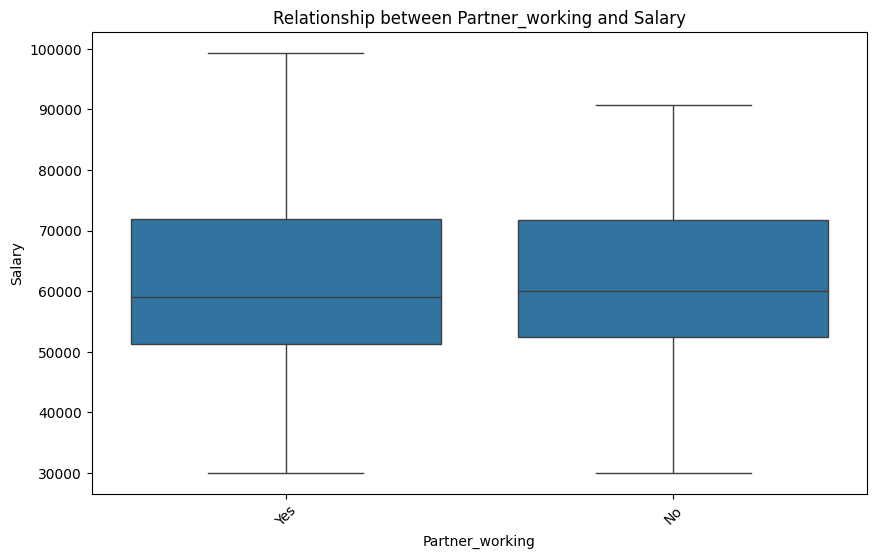

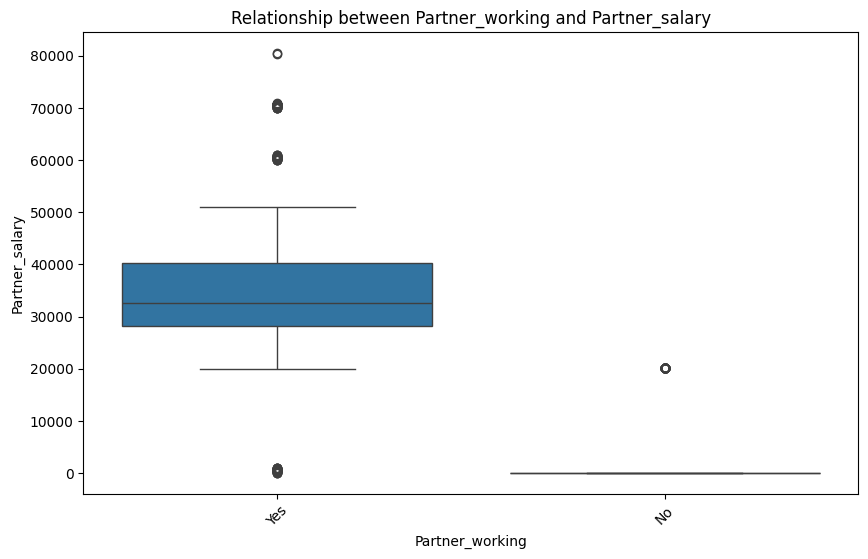

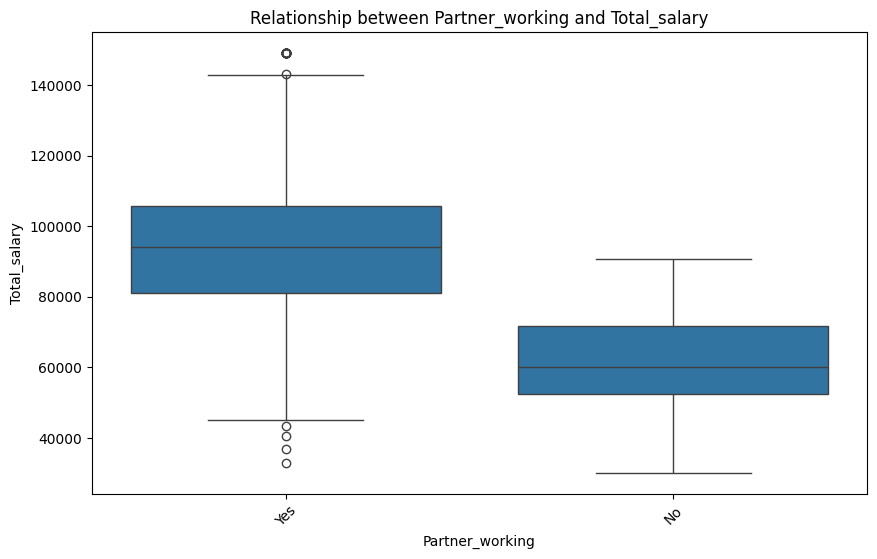

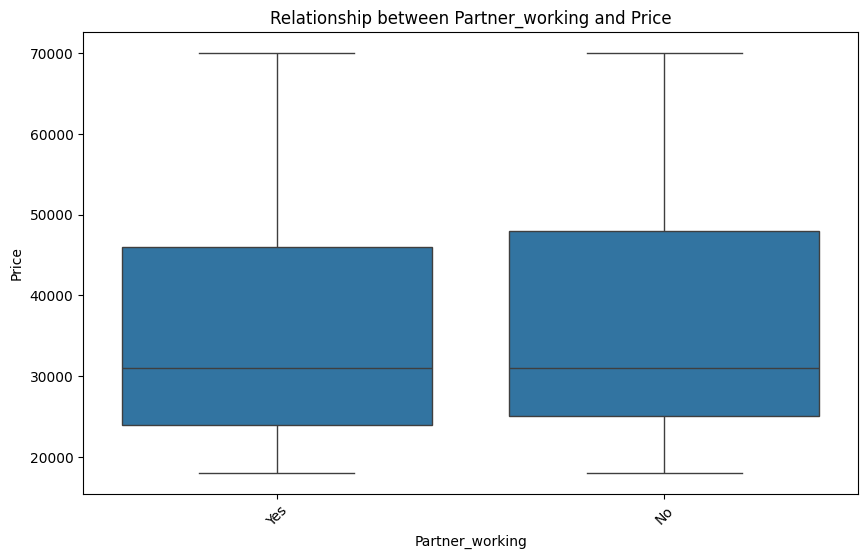

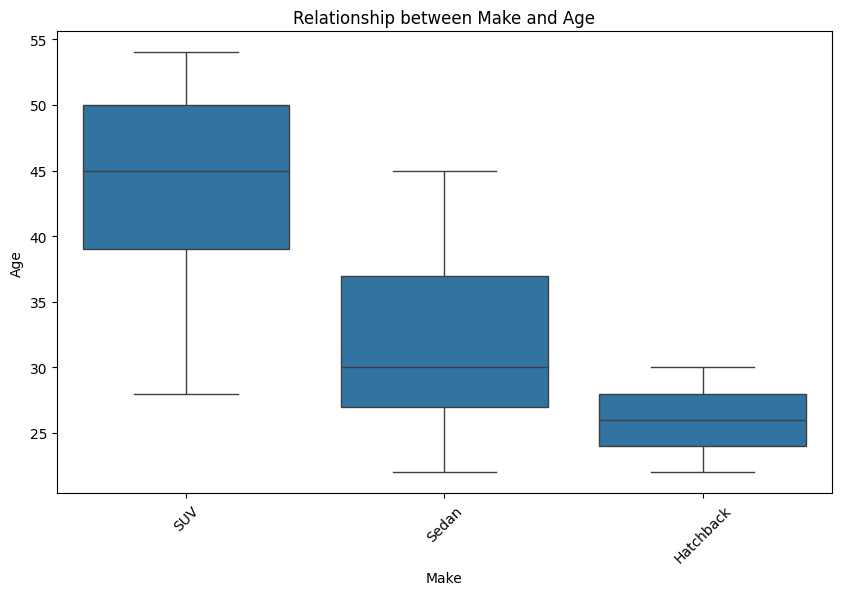

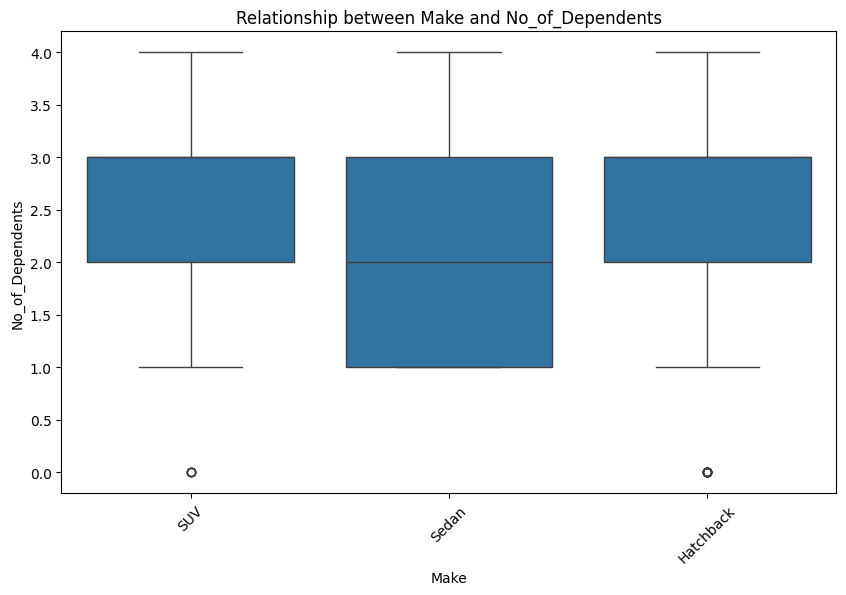

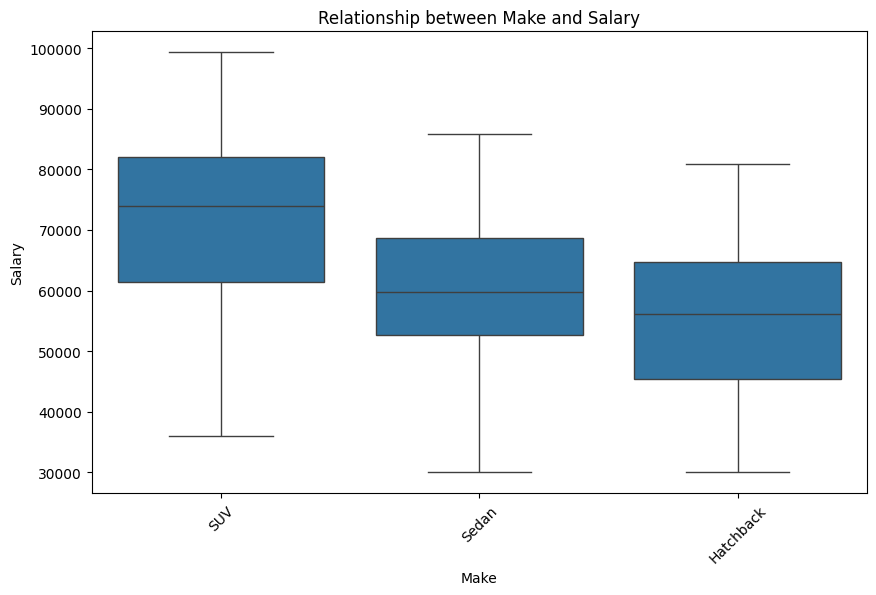

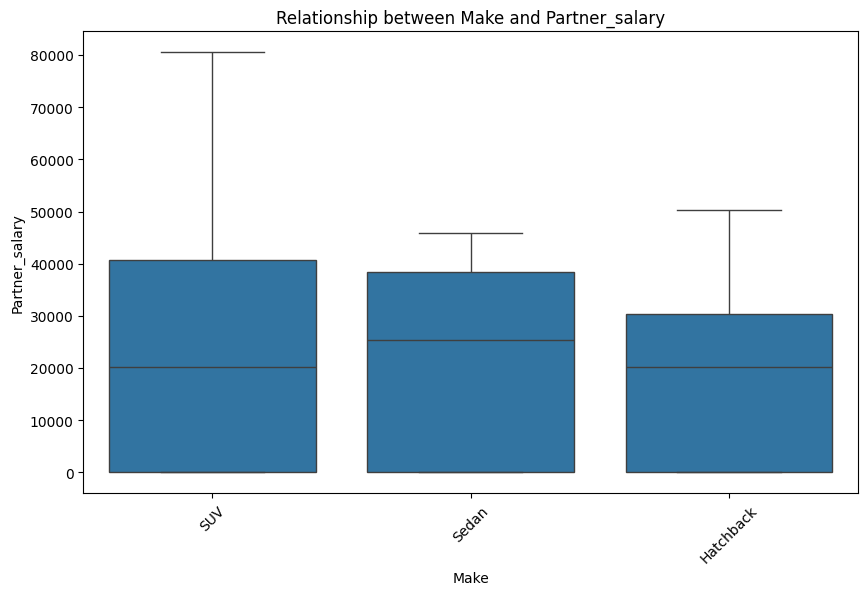

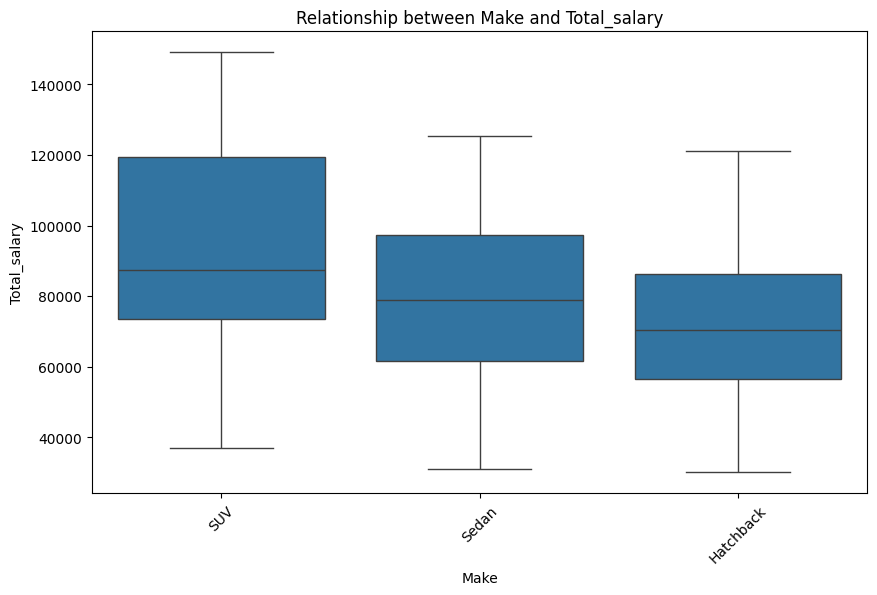

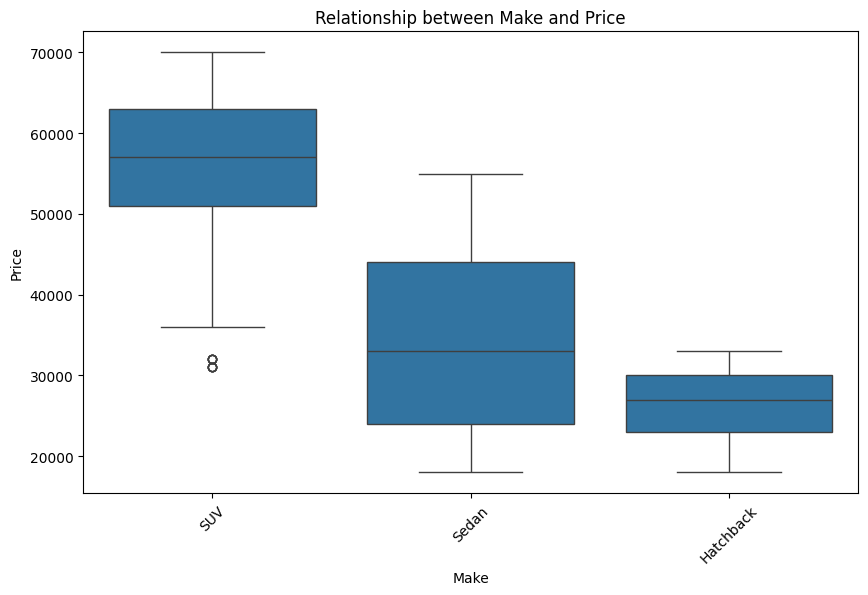

In [18]:
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=aut)
        plt.title(f'Relationship between {cat_col} and {num_col}')
        plt.xticks(rotation=45)
        plt.show()


#**Key** **Questions**

###1. Do men tend to prefer SUVs more compared to women?

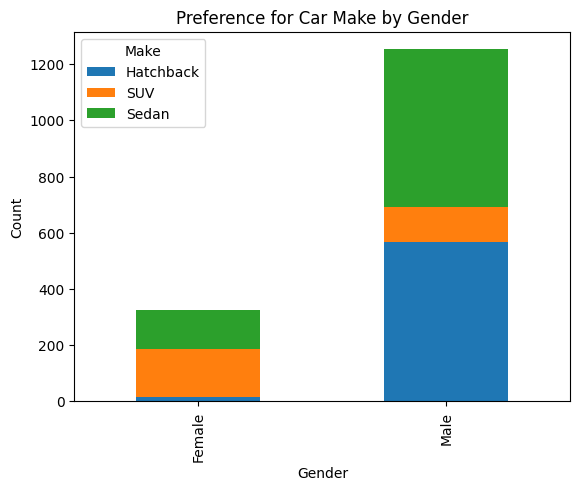

In [19]:
# Count the number of each 'Make' by 'Gender'
make_by_gender = aut.groupby(['Gender', 'Make']).size().unstack()
make_by_gender.plot(kind='bar', stacked=True)
plt.title('Preference for Car Make by Gender')
plt.ylabel('Count')
plt.show()


###2. What is the likelihood of a salaried person buying a Sedan?

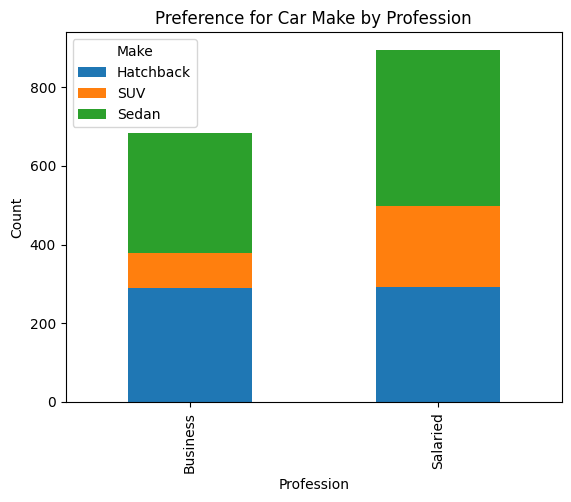

In [20]:
# Count the number of each 'Make' by 'Profession'
make_by_profession = aut.groupby(['Profession', 'Make']).size().unstack()
make_by_profession.plot(kind='bar', stacked=True)
plt.title('Preference for Car Make by Profession')
plt.ylabel('Count')
plt.show()


###3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

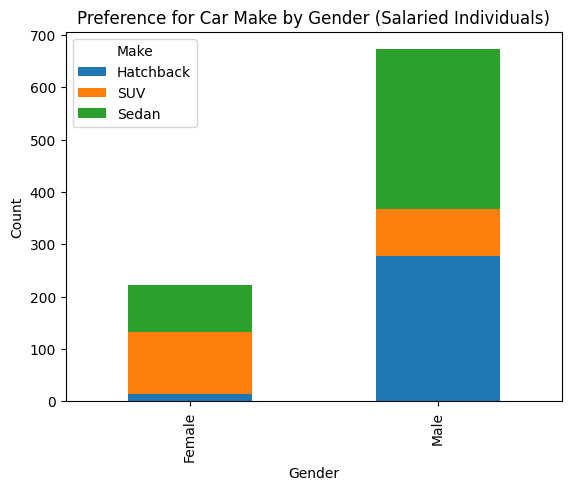

In [21]:
# Filterdata for salaried individuals
salaried_data = aut[aut['Profession'] == 'Salaried']
# Count the number of each 'Make' by 'Gender' for salaried individuals
make_by_gender_salaried = salaried_data.groupby(['Gender', 'Make']).size().unstack()
make_by_gender_salaried.plot(kind='bar', stacked=True)
plt.title('Preference for Car Make by Gender (Salaried Individuals)')
plt.ylabel('Count')
plt.show()


###4. How does the the amount spent on purchasing automobiles vary by gender?

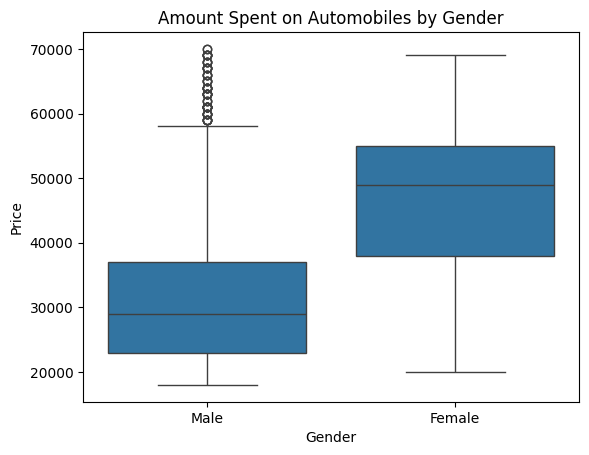

In [22]:
# Box plot for 'Price' by 'Gender'
sns.boxplot(x='Gender', y='Price', data=aut)
plt.title('Amount Spent on Automobiles by Gender')
plt.show()


###5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

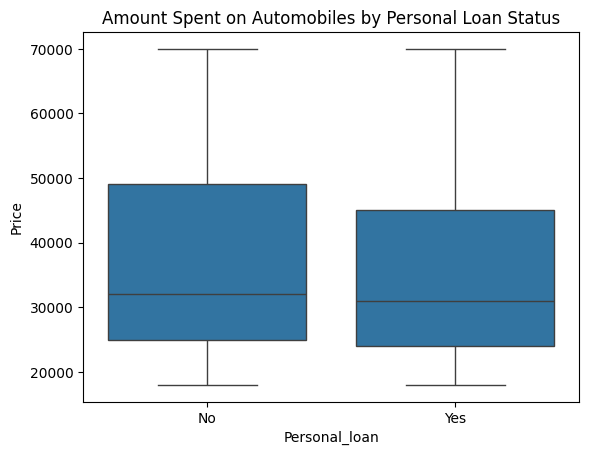

In [23]:
# Box plot for 'Price' by 'Personal_loan'
sns.boxplot(x='Personal_loan', y='Price', data=aut)
plt.title('Amount Spent on Automobiles by Personal Loan Status')
plt.show()


###6. How does having a working partner influence the purchase of higher-priced cars?

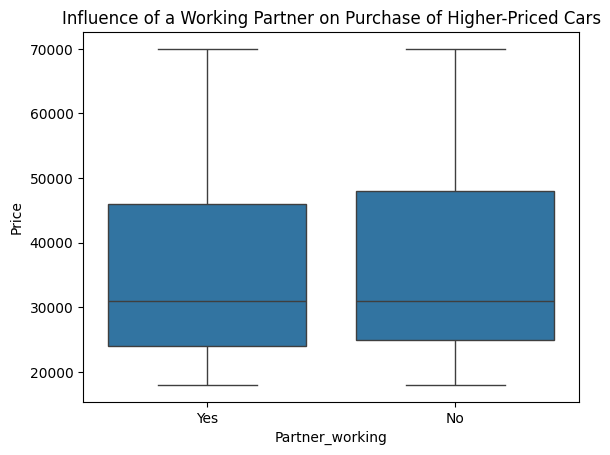

In [24]:
# Box plot for 'Price' by 'Partner_working'
sns.boxplot(x='Partner_working', y='Price', data=aut)
plt.title('Influence of a Working Partner on Purchase of Higher-Priced Cars')
plt.show()
